<a href="https://colab.research.google.com/github/VilasSonawane/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Vilas_Final_Copy_of_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The project focuses on three broad objectives:
* Analyze the sentiments of the reviews given by the customers in the data and make some useful conclusions in the form of Visualizations.

* **For the Company:** Cluster the zomato restaurants into different segments. Use the clustering to solve some business cases for the company to grow up and work on the fields they are currently lagging in.

* **For the customer:** The Analysis should solve some of the business cases that can directly help the customers finding the best restaurant in their locality. - Provide a methodology to find the best restaurants in Gachibowli(may be in various clusters given by the clustering analysis). You may use cuisine and costing info in cost vs. benefit analysis.
Also the metadata of reviewers can be used for identifying the critics in the industry.

# **Attribute Information**

There are two datasets available for us.
1. Zomato Restaurant names and metadata
2. Zomato Restaurant reviews

## **Zomato Restaurant names and Metadata**

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
# Installation of new libraries
!pip install textblob

# Installing a new library called squarify to draw tree maps
# Un-comment the below sentence if squarify is not installed
!pip install squarify

! pip install folium

In [ ]:
# Importing the libraries
from urllib.request import urlopen
import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import ast
import scipy
import math
import random
import matplotlib
import sklearn
import matplotlib.colors as mcolors
from datetime import datetime
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import squarify

import folium
from branca.element import Figure

# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
# to remove stopword
from nltk.corpus import stopwords
# for Stemming purpose
from nltk.stem.porter import PorterStemmer 
# for Calculate Sentiment Polarity
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Mounting the Google Drive folders to google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data into a csv
names_df = pd.read_csv('/content/drive/MyDrive/Data Squad zomato/Zomato Restaurant names and Metadata.csv')

review_df = pd.read_csv('/content/drive/MyDrive/Data Squad zomato/Zomato Restaurant reviews.csv')

### **Glossary:**
1. Data cleaning of restaurants data
2. Data cleaning of reviews data
3. Univariate analysis
  * Univariate analysis of Restaurants data
  * Univariate analysis of reviews data
4. Sentiment Analysis of user reviews

# **1) Data Cleaning of Restaurants Data**

## Web scraping for extracting additional data from the weblinks given in the restaurants data sets#
We will use the hyperlinks provided in the **Zomato restaurant names and metadata.csv** file to scrape some extra variables from the websites that may be useful for our ananlysis.

In [ ]:
# Defining a function to scrape the content in the website and return the html script of the page(Scraping already done, so no need to run again.)
'''
def send_request(url):
    response = requests.get(
        url='https://app.scrapingbee.com/api/v1/',
        params={
            'api_key': 'S2X6U0NGJAYG3SLEFPB80L2STD47D3Q7JC8P81J77EYXDS82UE6CBYAZP4AX9O69O0KHHY84U4QCKYTE',
            'url': url,  
        },
        
    )
    #print('Response HTTP Status Code: ', response.status_code)
    #print('Response HTTP Response Body: ', response.content)
    return response
'''

"\ndef send_request(url):\n    response = requests.get(\n        url='https://app.scrapingbee.com/api/v1/',\n        params={\n            'api_key': 'S2X6U0NGJAYG3SLEFPB80L2STD47D3Q7JC8P81J77EYXDS82UE6CBYAZP4AX9O69O0KHHY84U4QCKYTE',\n            'url': url,  \n        },\n        \n    )\n    #print('Response HTTP Status Code: ', response.status_code)\n    #print('Response HTTP Response Body: ', response.content)\n    return response\n"

In [ ]:
# Creating a new column to store the html string of each url
'''
names_df['content'] = np.nan
'''

"\nnames_df['content'] = np.nan\n"

In [ ]:
# Scraping through each url and storing the html string in the content column of the data frame
'''
for i,url in enumerate(names_df['Links']):
  response = send_request(url)
  content = response.content
  names_df.loc[i,'content'] = str(content)
'''

"\nfor i,url in enumerate(names_df['Links']):\n  response = send_request(url)\n  content = response.content\n  names_df.loc[i,'content'] = str(content)\n"

In [ ]:
# Writing the dataframe to a csv to ensure no data loss in working
'''
names_df.to_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v2')
'''

"\nnames_df.to_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v2')\n"

In [ ]:
# reading the dataframe from the csv file again to import the scraped data from the already prepared csv file
names_df = pd.read_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v2.csv')

In [ ]:
# checking for null entries
sum(names_df['content'].isnull())
# No null entries. so all the urls were scraped

0

We will extract the following additional variables from the urls provided to us using regular expressions on the html data scraped using the scraping bee library:
1. Latitude of the restaurant location
2. Longitude of the restaurant location
3. List of additional services offered by the restaurant
4. A binary variable to indicate if the restaurant has featured in the list of popular places in Hyderabad
5. The list of things a given restaurant is famous for.(as expressed by the customers)

In [ ]:
for i, content in enumerate(names_df['content']):
  # updating the string to a soup string to make parsing easier
  soup = str(BeautifulSoup(names_df.loc[i,'content'],"html.parser"))

  # Parsing the latitude and longitude
  tmp = list(re.finditer('https://maps.zomato.com/',soup))
  if len(tmp) == 0:
    names_df.loc[i,'latitude'] = np.nan
    names_df.loc[i,'longitude'] = np.nan
  else:
    loc = tmp[0].span()[0]
    geo_loc = re.findall('=.+&map',soup[loc:loc+200])[0][1:-4]
    names_df.loc[i,'latitude'] = geo_loc.split(',')[0]
    names_df.loc[i,'longitude'] = geo_loc.split(',')[1]

  # Parsing the List of additional services( as a dictionary item in the dataframe column)
  tmp_loc = re.search("More Info",str(soup))
  if tmp_loc==None:
    names_df.loc[i,'additional_services'] = np.nan
  else:
    more_loc = tmp_loc.span()[0]
    tmp = soup[more_loc:]
    inds = list(re.finditer('color="#4F4F4F"',tmp))
    services = list()
    for ind in inds:
      loc = ind.span()[0]
      services.append(re.findall('>.+</p',tmp[loc:loc+50])[0][1:-3])
    names_df.loc[i,'additional_services'] = str(services)
    
  # Identifying if the restaurant has featured in any of the best lists of the city - binary variable = 1 if featured, 0 otherwise
  names_df.loc[i,'Has_Featured'] = int(len(list(re.finditer('Featured In',soup)))>0)

  # Identifying what people associate this restaurant for
  inds = list(re.finditer("People Say This Place Is Known For",str(soup)))
  if len(inds) == 0:
    names_df.loc[i,'known_for'] = np.nan
  else:
    ind = inds[0].span()[0]
    tmp = soup[ind:ind+500]
    names_df.loc[i,'known_for']=re.findall('color="#4F4F4F">.+</p><h3',tmp)[0][16:-7]

In [ ]:
# dropping the content column
names_df.drop('content',axis = 1,inplace = True)

In [ ]:
names_df.head()

,Unnamed: 0,Unnamed: 0.1,Name,Links,Cost,Collections,Cuisines,Timings,latitude,longitude,additional_services,Has_Featured,known_for
0,0,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",17.4288789799,78.3739606768,"['Home Delivery', 'Takeaway Available', 'Seati...",0.0,"Ambience and Service, Courteous Staffs, Cozy, ..."
1,1,1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,17.4423818301,78.3565796167,"['Home Delivery', 'Takeaway Available', 'Valet...",1.0,"Good Food Service, Good for Large Groups, Happ..."
2,2,2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",17.4352545759,78.3680872992,"['Home Delivery', 'Takeaway Available', 'Free ...",1.0,"Value of Money Food, Good for Large Groups, Co..."
3,3,3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,17.4267217841,78.3764155582,"['Home Delivery', 'Takeaway Available', 'Indoo...",1.0,"Delivered on Time, Big Restaurant, Food was Go..."
4,4,4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",17.4401549529,78.3619356528,"['Home Delivery', 'Full Bar Available', 'Free ...",1.0,"Music and Feel, Good Food and Good Service, Am..."


Let us look deeper into the additional services extracted above.

In [ ]:
# Replacing nan values with an empty list
names_df['additional_services'] = names_df['additional_services'].replace(np.nan,'[]')

In [ ]:
# Creating a master list to find out how many and what catergories of additional services are available in total
master_list_add_servs = list()
for i, add_list in enumerate(names_df['additional_services']):
  master_list_add_servs.extend(ast.literal_eval(names_df.loc[i,'additional_services']))
master_list_add_servs = list(set(master_list_add_servs))

In [ ]:
len(master_list_add_servs)

51

In [ ]:
# So there are 51 unique additional services in total

In [ ]:
master_list_add_servs

['Disabled Friendly',
 'Brunch',
 'Full Bar Available',
 'Outdoor Seating',
 'Serves Alcohol',
 'Free Wifi',
 'Gaming Area',
 'Delivery Only',
 'Dress Code Applicable',
 'Free Parking',
 'Serves Cocktails',
 'Takeout Available',
 'Romantic Dining',
 'Table reservation required',
 'No Alcohol Available',
 'Indoor Seating',
 'Family Friendly',
 'Buffet',
 'Happy Hours',
 'Live Entertainment',
 'Vegetarian Only',
 'Wheelchair Accessible',
 'Desserts and Bakes',
 'Craft Beer',
 'Standing Tables',
 'Private Dining Area Available',
 'Restricted Entry',
 'Kid Friendly',
 'Wifi',
 'Breakfast',
 'Seating Available',
 'Smoking Area',
 'Pet Friendly',
 'Valet Parking Available',
 'Table Reservation Not Required',
 'Live Sports Screening',
 'Luxury Dining',
 'Group Meal',
 'Available for Functions',
 'Mall Parking',
 'High Chair Available',
 'Shared Seating Area',
 'No Seating Available',
 'Rooftop',
 'Dance Floor',
 'Table booking recommended',
 'Live Music',
 'Nightlife',
 'Takeaway Available',


We can merge some of the categories. The merged categories list can be found [here](https://docs.google.com/spreadsheets/d/1A9NweI1kGZVPELtCm50YipNIoEhqhcAuFhyZ3LBydtI/edit?usp=sharing)

In [ ]:
# Reading the google sheet containing the merged categories
sheet_id = "1A9NweI1kGZVPELtCm50YipNIoEhqhcAuFhyZ3LBydtI"
sheet_name = "Additional services"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
url = url.replace(" ", "%20")
new_services = pd.read_csv(url)
new_services = new_services[['Merged Category','Merged services']]

In [ ]:
# Checking if all the services are listed with the same names in the gsheet
m = list()
for serv_list in new_services['Merged services'].str.split('\n'):
  m.extend(serv_list)

for item in m:
  if item in master_list_add_servs:
    pass
  else:
    print(item)

All the services are listed with proper names. So we can go ahead and create our dataframe

In [ ]:
# Creating the new columns with one hot encoding
hot_dict = dict()
for i,cat in enumerate(new_services['Merged Category']):
  serv_list = new_services['Merged services'].str.split('\n')[i]
  tmp = list()
  for j,row in enumerate(names_df['additional_services']):
    row = ast.literal_eval(row)
    tmp.append(int(len(set(row).intersection(set(serv_list)))>0))
  hot_dict.update({cat:tmp})

In [ ]:
hot_encoded_servs_df = pd.DataFrame(hot_dict)
hot_encoded_servs_df.sum()

Vegetarian only       4
Outdoor seating      10
Entertainment        20
Work Friendly         3
Wifi                 23
Breakfast            21
Delivery only         4
Parking available    31
Seating available    74
Alcohol avialable    27
Family Friendly       8
Home Delivery        72
No Alcohol            2
Brunch                7
Restricted entry      2
Luxury dining         1
Romantic Dining      11
dtype: int64

* Many of the services are offered by very less number of restaurants. Let us drop all those services which are offered by less than 5 restaurants

In [ ]:
to_drop = hot_encoded_servs_df.sum().reset_index().rename(columns = {'index':'service_category',0:'no_of_rests'})
hot_encoded_servs_df.drop(list(to_drop[to_drop['no_of_rests']<=5].service_category),axis = 1,inplace = True)

In [ ]:
hot_encoded_servs_df.shape

(105, 11)

In [ ]:
hot_encoded_servs_df.columns

Index(['Outdoor seating', 'Entertainment', 'Wifi', 'Breakfast',
       'Parking available', 'Seating available', 'Alcohol avialable',
       'Family Friendly', 'Home Delivery', 'Brunch', 'Romantic Dining'],
      dtype='object')

In [ ]:
names_df.shape

(105, 13)

In [ ]:
# Appending the new columns to the names_df dataframe
names_df = pd.concat([names_df,hot_encoded_servs_df],axis = 1)
names_df.drop(['Unnamed: 0', 'Unnamed: 0.1','additional_services'],axis = 1,inplace = True)

In [ ]:
names_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'latitude', 'longitude', 'Has_Featured', 'known_for', 'Outdoor seating',
       'Entertainment', 'Wifi', 'Breakfast', 'Parking available',
       'Seating available', 'Alcohol avialable', 'Family Friendly',
       'Home Delivery', 'Brunch', 'Romantic Dining'],
      dtype='object')

Let us explore the 'known_for' column.

In [ ]:
# Cleaning the 'People say this is known for' column
names_df['known_for'] = names_df['known_for'].replace(np.nan,'')

# Some observations in this column has extra unnecessary text that starts with 'class='. Identifying them and removing
bool_series = names_df['known_for'].str.contains('class=')
for i in names_df.loc[bool_series].index:
  tmp = names_df.iloc[i]['known_for']
  names_df.at[i,'known_for'] = tmp[:tmp.find('<')]

The observations inside the timings column are given in very inconsistent format. Let us explore the column to extract key information.

In [ ]:
names_df['Timings'].values[:5]

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)'],
      dtype=object)

In [ ]:
# Replacing the missing values with empty strings
names_df['Timings']=names_df['Timings'].replace(np.nan,'')

# Converting the strings in the column to lowercase
names_df['Timings'] = names_df['Timings'].str.lower()

In [ ]:
def multiple_str_replaces(org_str,maps):
  '''
  This function takes a dictionary of mapping with keys as the charecters to be replaced in a string and
  the values as the characters to be replaced with
  '''
  for l,r in maps.items():
    org_str = org_str.replace(l,r)
  return org_str

In [ ]:
# Defining the list of things we want to format by replacements.
mappings = {'noon':'pm','midnight':'am','),':');'}

# Applying the above changes to all the entries in the column
names_df['Timings'] = names_df['Timings'].apply(lambda x: multiple_str_replaces(x,maps = mappings))

In [ ]:
def drop_closed_days(in_str):
  '''
  This function deletes the days when the restaurant is closed Ex: the text tue closed, thu closed will be deleted
  '''
  regex = re.compile('[a-z]{3} closed|closed \([a-z]{3}\)')
  result = re.findall(regex,in_str)
  for text in result:
    in_str = in_str.replace('; '+text,'')
  return in_str

In [ ]:
# Applying the above function
names_df['Timings'] = names_df['Timings'].apply(lambda x: drop_closed_days(x))

In [ ]:
def expand_days(in_str):
  '''
  This function takes a from-to of week days string and replaces it with all the days in between.
  For Ex: 'tue-sat' will be replaced by 'tue,wed,thu,fri,sat'
  '''
  days = ['mon','tue','wed','thu','fri','sat','sun']
  in_days = in_str.split('-')
  
  result = ''

  for i,day in enumerate((days*2)[(days*2).index(in_days[0]):]):
    if day == in_days[1]:
      result = result+', '+day
      break
    elif i==0:
      result = result+day
    else:
      result = result+', '+day
  return result

In [ ]:
def open_days(in_str):
  '''
  This function returns the list of days on which a restaurant is open given a string of 'timings' column as argument
  '''
  regex = re.compile(".*?\((.*?)\)")
  result = re.findall(regex, in_str)
  for i,text in enumerate(result):
    if '-' in text:
      result[i] = expand_days(result[i])
    else:
      pass
  result = ', '.join(result)
  if result == '':
    result = ''
  else:
    result = str(list(set(result.split(', '))))
  return result

In [ ]:
# Manually updating an occurence which is in a different format
names_df.at[95,'Timings'] = '1 pm to 2 am (mon), (wed-sun)'

# Applying the above function all the occurences in the timings column
names_df['Open_days'] = names_df['Timings'].apply(lambda x: open_days(x))

# Assuming that the restaurants whose open days are not listed are open on all days
names_df['Open_days']=names_df['Open_days'].replace('',str(['mon','tue','wed','thu','fri','sat','sun']))

In [ ]:
names_df['Open_days'].values[:10]

array(["['wed', 'thu', 'fri', 'sun', 'sat', 'mon', 'tue']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['wed', 'sun', 'thu', 'fri', 'sat', 'mon', 'tue']",
       "['wed', 'sun', 'thu', 'fri', 'sat', 'mon', 'tue']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']",
       "['wed', 'thu', 'fri', 'sun', 'sat', 'mon', 'tue']"], dtype=object)

In [ ]:
#Dropping the redundant columns
names_df.drop(['Links'],axis = 1, inplace = True)

# Cuisine data cleaning

In [ ]:
# Creating a master cuisine list
cuisine_list = list()
for i, cuslist in enumerate(names_df.Cuisines.str.split(', ')):
  cuisine_list.extend(cuslist)

cuisine_list = list(set(cuisine_list))
len(cuisine_list)

44

There are 44 unique cuisines offered by the restaurants. Some of them can be merged together. You can find the list of cuisines merged together [here](https://docs.google.com/spreadsheets/d/1A9NweI1kGZVPELtCm50YipNIoEhqhcAuFhyZ3LBydtI/edit#gid=1145411354)

In [ ]:
# Reading the google sheet containing the merged cuisines
sheet_id = "1A9NweI1kGZVPELtCm50YipNIoEhqhcAuFhyZ3LBydtI"
sheet_name = "Cuisines"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
url = url.replace(" ", "%20")
new_cuisines = pd.read_csv(url)
new_cuisines = new_cuisines[['Category','Cuisine']]

In [ ]:
new_cuisines

,Category,Cuisine
0,North Indian,North Indian
1,Chinese,Chinese
2,Continental/ Mexican,Continental\nEuropean\nAmerican\nMexican\nSpan...
3,Biryani/Mughlai,Biryani\nKebab\nMughlai\nHyderabadi
4,Asian,Asian\nIndonesian\nMalaysian\nJapanese\nThai
5,Fast Food,Fast Food\nCafe\nBurger\nMomos\nStreet Food\nF...
6,Desserts/ Juices / Bakery,Desserts\nSalad\nBakery\nIce Cream\nJuices\nMi...
7,South Indian,South Indian\nAndhra
8,Seafood,Seafood\nSushi
9,Arabian,Arabian\nMediterranean\nLebanese


In [ ]:
# Checking if all the cuisines are listed with the same names in the gsheet
m = list()
for cus_list in new_cuisines['Cuisine'].str.split('\n'):
  m.extend(cus_list)

for item in m:
  if item in cuisine_list:
    pass
  else:
    print(item)

All the cuisines are listed with proper names. So we can go ahead and create our dataframe

In [ ]:
# Creating the new columns with one hot encoding
hot_dict = dict()
for i,cus in enumerate(new_cuisines['Category']):
  cus_list = new_cuisines['Cuisine'].str.split('\n')[i]
  tmp = list()
  for j,row in enumerate(names_df['Cuisines']):
    row = row.split(', ')
    tmp.append(int(len(set(row).intersection(set(cus_list)))>0))
  hot_dict.update({cus:tmp})

In [ ]:
hot_encoded_cus_df = pd.DataFrame(hot_dict)
hot_encoded_cus_df.sum()

North Indian                 61
Chinese                      43
Continental/ Mexican         33
Biryani/Mughlai              27
Asian                        17
Fast Food                    30
Desserts/ Juices / Bakery    25
South Indian                 13
Seafood                       8
Arabian                       8
dtype: int64

In [ ]:
hot_encoded_cus_df.shape

(105, 10)

In [ ]:
hot_encoded_cus_df.head()

,North Indian,Chinese,Continental/ Mexican,Biryani/Mughlai,Asian,Fast Food,Desserts/ Juices / Bakery,South Indian,Seafood,Arabian
0,1,1,1,1,0,0,0,1,0,0
1,1,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,1
3,1,1,0,1,0,0,1,0,1,0
4,1,1,1,0,1,0,0,0,0,1


In [ ]:
names_df.shape

(105, 21)

In [ ]:
# Appending the new columns to the names_df dataframe
names_df = pd.concat([names_df,hot_encoded_cus_df],axis = 1)
names_df.drop(['Cuisines'],axis = 1,inplace = True)

In [ ]:
names_df.columns

Index(['Name', 'Cost', 'Collections', 'Timings', 'latitude', 'longitude',
       'Has_Featured', 'known_for', 'Outdoor seating', 'Entertainment', 'Wifi',
       'Breakfast', 'Parking available', 'Seating available',
       'Alcohol avialable', 'Family Friendly', 'Home Delivery', 'Brunch',
       'Romantic Dining', 'Open_days', 'North Indian', 'Chinese',
       'Continental/ Mexican', 'Biryani/Mughlai', 'Asian', 'Fast Food',
       'Desserts/ Juices / Bakery', 'South Indian', 'Seafood', 'Arabian'],
      dtype='object')

In [ ]:
# Writing the updated dataframe to a csv file
names_df.to_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v3.csv')

# **2) Data Cleaning of Reviews data**

In [ ]:
review_df.shape

(10000, 7)

In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


The number of missing values is very less. Let us just drop them.

In [ ]:
review_df.dropna(inplace = True)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


Let us convert the rating column to numeric format.

In [ ]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

Some of the ratings are given as 'Like'. Let us find out how many of them are listed like that

In [ ]:
review_df[review_df.Rating=='Like'].shape[0]

1

Just one occurence, so we can just replace it by a score of 5.

In [ ]:
# So Lets repalce the "Like" into Rating "5"
review_df.Rating = review_df.Rating.replace('Like', '5')

In [ ]:
# converting the ratings column to a float
review_df['Rating'] = review_df['Rating'].astype(float)

Let us split the metadata column into reviews and followers

In [ ]:
def extract_no(in_str):
  '''
  This function takes an observation in the metadata column and returns the number of reviews and
  no of followers as a list
  '''
  in_str = in_str.lower()
  split_list = in_str.split(',')
  result = [0,0]
  for i in split_list:
    if 'review' in i:
      result[0] = int(re.search('\d+',i).group())
    elif 'follower' in i:
      result[1] = int(re.search('\d+',i).group())
  return result

In [ ]:
# Creating two additional columns
review_df['No_of_review'] = review_df['Metadata'].apply(lambda x: extract_no(x)[0])
review_df['No_of_Follower'] = review_df['Metadata'].apply(lambda x: extract_no(x)[1])

# Dropping the Metadata column
review_df.drop('Metadata',axis=1,inplace=True)

Let us convert the time column into appropriate date time format

In [ ]:
review_df['Time'] = review_df['Time'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M'))

# **3) Univariate Analysis**

## Univariate analysis of the Restaurants data

In [ ]:
names_df.shape

(105, 30)

In [ ]:
names_df.head()

,Name,Cost,Collections,Timings,latitude,longitude,Has_Featured,known_for,Outdoor seating,Entertainment,...,North Indian,Chinese,Continental/ Mexican,Biryani/Mughlai,Asian,Fast Food,Desserts/ Juices / Bakery,South Indian,Seafood,Arabian
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","12pm to 3:30pm, 6:30pm to 11:30pm (mon-sun)",17.4288789799,78.3739606768,0.0,"Ambience and Service, Courteous Staffs, Cozy, ...",0,0,...,1,1,1,1,0,0,0,1,0,0
1,Paradise,800,Hyderabad's Hottest,11 am to 11 pm,17.4423818301,78.3565796167,1.0,"Good Food Service, Good for Large Groups, Happ...",0,0,...,1,1,0,1,0,0,0,0,0,0
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest","11:30 am to 4:30 pm, 6:30 pm to 11 pm",17.4352545759,78.3680872992,1.0,"Value of Money Food, Good for Large Groups, Co...",0,0,...,1,0,0,0,1,0,1,0,0,1
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,12 pm to 2 am,17.4267217841,78.3764155582,1.0,"Delivered on Time, Big Restaurant, Food was Go...",0,0,...,1,1,0,1,0,0,1,0,1,0
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","12pm to 11pm (mon, tue, wed, thu, sun); 12pm t...",17.4401549529,78.3619356528,1.0,"Music and Feel, Good Food and Good Service, Am...",0,1,...,1,1,1,0,1,0,0,0,0,1


In [ ]:
#dropping the unnecessary columns
names_df.drop(['Timings','known_for'],axis =1 ,inplace = True)

In [ ]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       105 non-null    object 
 1   Cost                       105 non-null    object 
 2   Collections                51 non-null     object 
 3   latitude                   104 non-null    object 
 4   longitude                  104 non-null    object 
 5   Has_Featured               105 non-null    float64
 6   Outdoor seating            105 non-null    int64  
 7   Entertainment              105 non-null    int64  
 8   Wifi                       105 non-null    int64  
 9   Breakfast                  105 non-null    int64  
 10  Parking available          105 non-null    int64  
 11  Seating available          105 non-null    int64  
 12  Alcohol avialable          105 non-null    int64  
 13  Family Friendly            105 non-null    int64  

### 1) Cost

In [ ]:
# changing the data type of the cost function
names_df['Cost'] = names_df['Cost'].str.replace(",","").astype('int64')

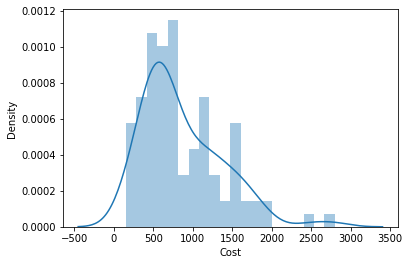

In [ ]:
## Let us look at the distribution of the per person costs of the restaurants
sns.distplot(a=names_df['Cost'], bins=20,kde=True,hist = True)

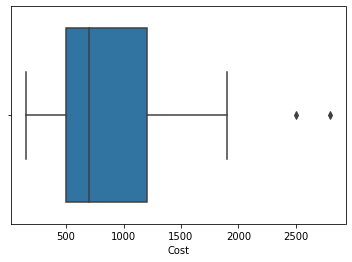

In [ ]:
# Boxplot of the cost variable
sns.boxplot(x=names_df['Cost'])

The distribution of cost is positively skewed with a median of around 700 Rs. per person. The restaurants are mostly in the range of 100-2800 Rs. per person.

### 2) Collections

This column has too many missing values(>50%) and it is mainly text based and we have extracted similar and more reliable information from the website in the 'known_for' column. So we can drop this column

In [ ]:
names_df.drop('Collections',axis = 1, inplace=True)

### 3) Cuisines

In [ ]:
cuisine_count = names_df[['North Indian', 'Chinese', 'Continental/ Mexican',
       'Biryani/Mughlai', 'Asian', 'Fast Food', 'Desserts/ Juices / Bakery',
       'South Indian', 'Seafood', 'Arabian']].sum().reset_index().rename(columns={'index': 'Cuisine',0:'No of Restaurants'})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

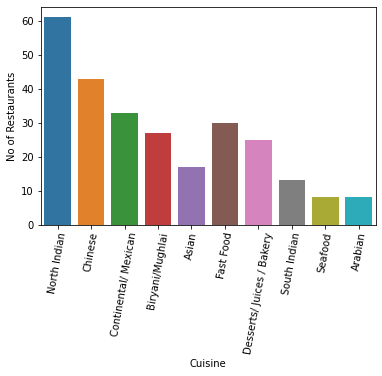

In [ ]:
# Bar plot of cuisines
sns.barplot(x=cuisine_count['Cuisine'],y=cuisine_count['No of Restaurants'])
plt.xticks(rotation=80)

* North Indian is the predominant cuisine in Gachibowli Hyderabad. It is offered in 60% of the restaurants in the area. It is followed by Chinese and Conitnental/Mexican cuisine.

### 4) Latitude and Longitude
Let us visualize the locations of the restaurants using maps

In [ ]:
# We know from the above table(from names_df.info()) that there is one missing item in the latitude and longitudes. Let us just drop it
names_df.dropna(subset = ['latitude','longitude'],inplace = True)

In [ ]:
names_df.shape

(104, 27)

In [ ]:
# latitudes and longitudes are currently in the string format. We need to convert them into a numeric format
names_df['latitude'] = names_df['latitude'].astype(float)
names_df['longitude'] = names_df['longitude'].astype(float)

In [ ]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[names_df.iloc[3]['latitude'],names_df.iloc[5]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=20)

mapit.save('map.html')

In [ ]:
# Adding the markers of restaurant locations
for i in names_df.index:
  folium.Marker(location=[names_df.latitude[i], names_df.longitude[i]]).add_to(mapit)

In [ ]:
mapit

Majority of the restaurants seem to be located on the old-bombay highway. It is interesting to note that three clear clusters are visible clearly:
1. Along the old bombay highway
2. Below the highway(towards ISB)
3. Above the highway(towards Botanical gardens)

### 5) Binary variables(Has featured and additional services)

In [ ]:
# Creating the list of binary variables
bin_vars = ['Has_Featured',
       'Outdoor seating', 'Entertainment', 'Wifi', 'Breakfast',
       'Parking available', 'Seating available', 'Alcohol avialable',
       'Family Friendly', 'Home Delivery', 'Brunch', 'Romantic Dining']

bin_df = round((names_df[bin_vars].sum()/names_df.shape[0])*100,1).reset_index()
bin_df.columns = ['Variable','% of restaurants']
bin_df

,Variable,% of restaurants
0,Has_Featured,26.0
1,Outdoor seating,9.6
2,Entertainment,19.2
3,Wifi,22.1
4,Breakfast,20.2
5,Parking available,29.8
6,Seating available,71.2
7,Alcohol avialable,26.0
8,Family Friendly,7.7
9,Home Delivery,69.2


* Gachibowli seems to be have a lot of very famous restaurants since 26% of the restaurants in this small area alone have featured in the list of Hyderabad's best restaurants.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

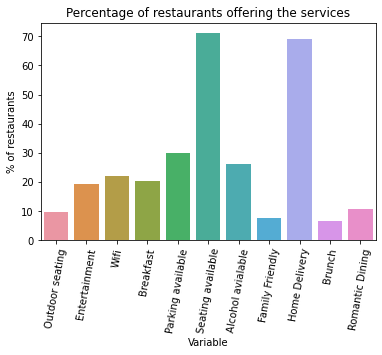

In [ ]:
# Let us look at the bar plot of the share of restaurants that offer each of the additional services
sns.barplot(x='Variable',y='% of restaurants',data = bin_df.iloc[1:])
plt.title('Percentage of restaurants offering the services')
plt.xticks(rotation=80)

* It is interesting to note that 70% of the restaurants have home delivery services as well as indoor dining facilities available.

* Parking space is available only in 30% of the restaurants. This is an area for improvement.

### 6) Open days

In [ ]:
names_df['Open_days']

0      ['wed', 'thu', 'fri', 'sun', 'sat', 'mon', 'tue']
1      ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
2      ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
3      ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
4      ['wed', 'sun', 'thu', 'fri', 'sat', 'mon', 'tue']
                             ...                        
100    ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
101    ['wed', 'thu', 'fri', 'sun', 'sat', 'mon', 'tue']
102    ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
103    ['wed', 'thu', 'fri', 'sun', 'sat', 'mon', 'tue']
104    ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
Name: Open_days, Length: 104, dtype: object

In [ ]:
x=names_df['Open_days'][0]

In [ ]:
sum(names_df['Open_days'].apply(lambda x: int(len(ast.literal_eval(x))<7)))

5

Only 5 restaurants do not open on all days of the week.

At an initial glance it appears that significant majority of the restaurants are open on all the days of the week.(But note that some restaurants open for only a few hours on some days of the week). Let us look at the restaurants that are not open on all days to look at them easily.

In [ ]:
# so then Lets drop open_days column so as such it will not contribute much in further analysis specialy for clustering.
names_df.drop('Open_days',axis = 1, inplace = True)

## **Univariate analysis of the Reviews data**

In [ ]:
review_df.shape

(9955, 8)

In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_review,No_of_Follower
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2


### 1) Restaurant column

In [ ]:
res_count = review_df['Restaurant'].value_counts().reset_index().rename(columns = {'index':'Restaurant','Restaurant':'No of reviews'})

In [ ]:
res_count.sort_values('No of reviews',ascending = False)

,Restaurant,No of reviews
0,Beyond Flavours,100
59,SKYHY,100
68,Flechazo,100
67,Shah Ghouse Hotel & Restaurant,100
66,Over The Moon Brew Company,100
...,...,...
95,Being Hungry,99
96,Olive Garden,99
97,Hyderabad Chefs,98
98,Arena Eleven,85


Every restaurant has almost comparable number of reviews. The no of reviews range from 77 to 100

### 2) Reviewer, No of followers, No of reviews

In [ ]:
# Calculating the max number of reviews and number of followers(as per the latest review) of each reviewer
reviewer_info = review_df.groupby('Reviewer').agg({'No_of_review':max, 'No_of_Follower':max}).reset_index()

In [ ]:
reviewer_info.shape

(7442, 3)

In [ ]:
reviewer_info.head()

,Reviewer,No_of_review,No_of_Follower
0,#FOODPORN,35,5873
1,#chloesviews // CAH,3,1
2,$ign,50,55
3,4mybanti,7,4
4,@FuloriBinaChutneyKaiseBani,86,244


There are 7442 unique reviewers who have given 9550 reviews approximately

In [ ]:
reviewer_info.sort_values(['No_of_review','No_of_Follower'],ascending = False, inplace=True)

**Top 10 Critics in The Market (Based on No of Reviews Given)**


Text(0.5, 1.0, 'Top 10 Critics In The Industry (Based On No of Reviews)')

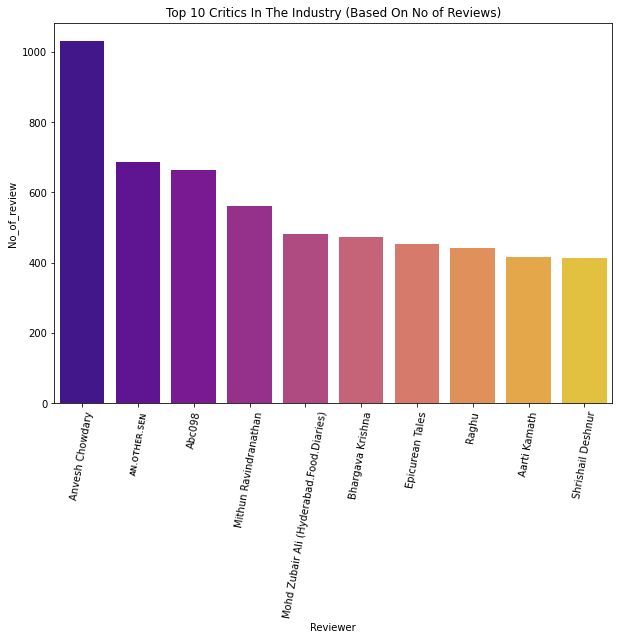

In [ ]:
# Let us look at the top 10 critics of the restaurant industry according the number of reviews given
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=reviewer_info.head(10), y='No_of_review', x='Reviewer',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=80)
plt.title('Top 10 Critics In The Industry (Based On No of Reviews)')

**Top 10 Critics in The Market (Based on No of Followers)**

Text(0.5, 1.0, 'Top 10 Critics In The Industry (Based On No of Reviews)')

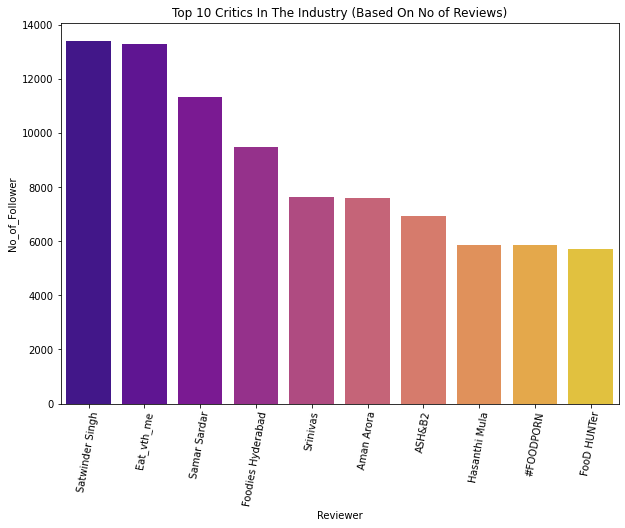

In [ ]:
# Let us look at the top 10 critics of the restaurant industry according the number of followers
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=reviewer_info.sort_values('No_of_Follower',ascending=False).head(10), y='No_of_Follower', x='Reviewer',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=80)
plt.title('Top 10 Critics In The Industry (Based On No of Reviews)')

### 3) Ratings

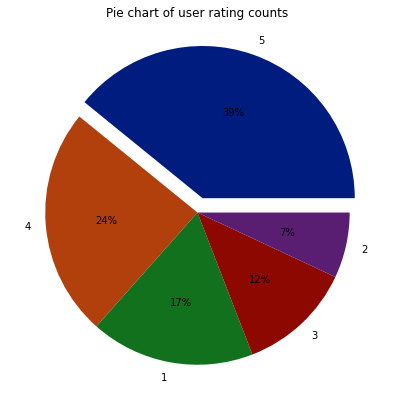

In [ ]:
## Let us look at the distribution of the ratings
plt.figure(figsize=(10, 7))
# Rounding off the ratings to nearest upper integers
review_df['Rating'] = review_df['Rating'].apply(lambda x: math.floor(x+0.6))
plot_df = review_df['Rating'].value_counts().reset_index().rename(columns={'index':'Rating','Rating':'count'})

# declaring exploding pie
explode = [0.1, 0, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(plot_df['count'], labels=plot_df['Rating'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.title('Pie chart of user rating counts')
plt.show()

#**4) Sentiment Analysis of user reviews**

**Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context.**

In [ ]:
# Lets Create Function to Clean Review Text
def clean_review(review):
  '''
  Utility function to clean Review text by removing links, special characters
  using simple regex statements.
  '''
  review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", review)
  review = review.lower()
  
  # split to array(default delimiter is " ")
  review = review.split()
  
  # in string array at ith row   
  review = [word for word in review if not word in set(stopwords.words('english'))-{'not'}]             
  
  # rejoin all string array elements
  # to create back into a string
  review = ' '.join(review)   
  
  return review

In [ ]:
# create an root word for the words in reviews
stemmer = PorterStemmer()

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
def get_review_sentiment(review):
  '''
  Utility function to classify sentiment of passed Review
  using textblob's sentiment method
  '''
  
  # create TextBlob object of passed Review
  analysis = TextBlob(clean_review(review))
  
  # set sentiment
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity == 0:
    return 'neutral'
  else:
    return 'negative'

In [ ]:
def getSubjectivity(review):
  return TextBlob(clean_review(review)).sentiment.subjectivity

In [ ]:
def getPolarity(review):
  return TextBlob(clean_review(review)).sentiment.polarity

In [ ]:
# Get Clean Review Column
review_df['clean_review'] = review_df['Review'].apply(clean_review)

In [ ]:
review_df['clean_review'] = review_df['Review'].apply(stemming)

In [ ]:
# Get Sentiment Polarity
review_df['Sentiment_Polarity'] = review_df['Review'].apply(getPolarity )


In [ ]:
# Get Sentiment Subjectivity
review_df['Sentiment_Subjectivity'] = review_df['Review'].apply(getSubjectivity )

In [ ]:
# Get Sentiment Analysis
review_df['Sentiment'] = review_df['Review'].apply(get_review_sentiment )

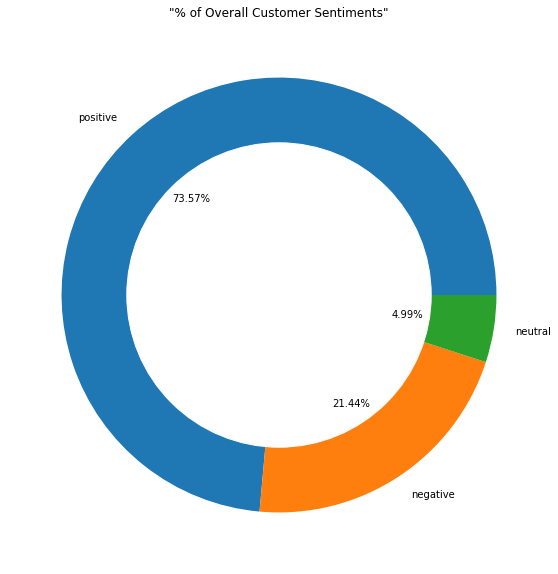

In [ ]:
#Lets see pie plot of Overall Customer Sentiment about there Experiance @ Zomato Restaurants
plt.figure(figsize=(10,10))
plt.pie( review_df.Sentiment.value_counts() ,labels=review_df.Sentiment.value_counts().index,autopct='%1.2f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"% of Overall Customer Sentiments"')
plt.show()

So based on sentiment analysis of the reviewa given by customer 
1. Overall 73.57 % Reviewer have given Positive reviews.
2. 21.44 % Reviewer have given Negative reviews.  
3. 4.99 % Reviewer have given Neutral reviews. 

## **Important words used by customer while expressing their Sentiments**

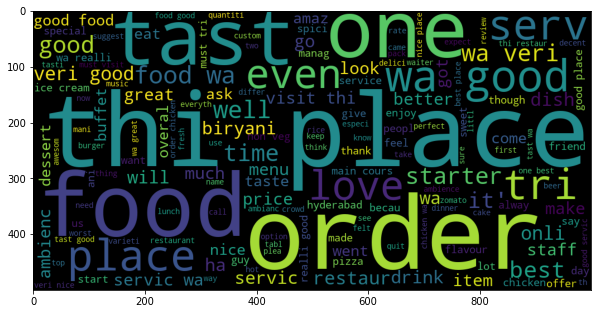

In [ ]:
# Lets Findout the frequency or importance of the Words used by customer
from wordcloud import WordCloud
word_cloud = ""
for row in review_df.clean_review:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(word_cloud)
plt.figure(figsize= (10,7))
plt.imshow(wordcloud)

## **Top 10 (Most Populer) Restaurants In Hyderabad based on Customer Review (Sentiment)**

In [ ]:
df = review_df.groupby(by =review_df.Restaurant)['Sentiment_Polarity','Sentiment_Subjectivity','Rating'].mean().sort_values(by=['Sentiment_Polarity'],ascending = False).reset_index()

In [ ]:
df.rename(columns={'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity','Rating':'Average_Rating'}, inplace = True)

Text(0.5, 1.0, 'Top 10 Restaurants in Hyderabad (Based On Customer Review)')

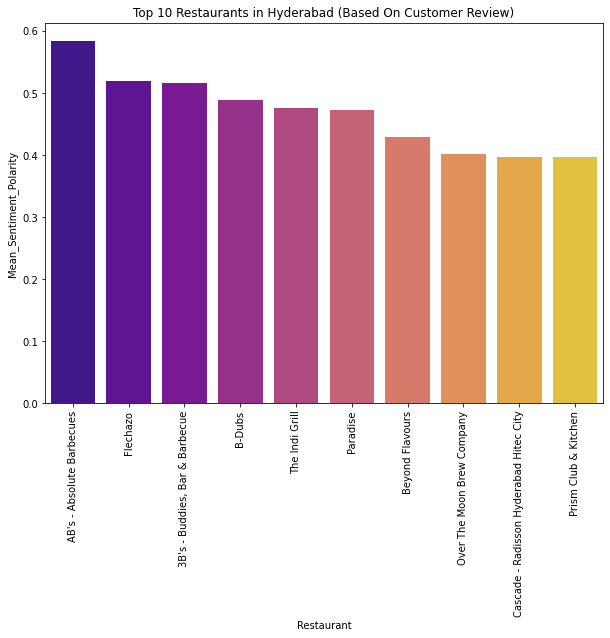

In [ ]:
# Top 10 Restaurants in Hyderabad (Based On Customer Review)
plt.figure(figsize=(10, 7))
plot=sns.barplot(data= df.head(10), x="Restaurant",y='Mean_Sentiment_Polarity', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Top 10 Restaurants in Hyderabad (Based On Customer Review)')

So Restaurant AB's Absoulute Barbecues is the Most populer Restaurant in Hyderabad based on customer reviews and Average Rating. Beacause That is the only Restaurant which has given Overall  Mean Sentiment Polarity around 0.59 & Minimum average Rating of Customers, Means Most of the Customer has given +ve review about the services provide by Restaurants.

## **Worst 10 (Least Populer) Restaurants In Hyderabad based on Customer Review (Sentiment)**

Text(0.5, 1.0, ' Worst 10 Restaurants in Hyderabad (Based On Customer Review)')

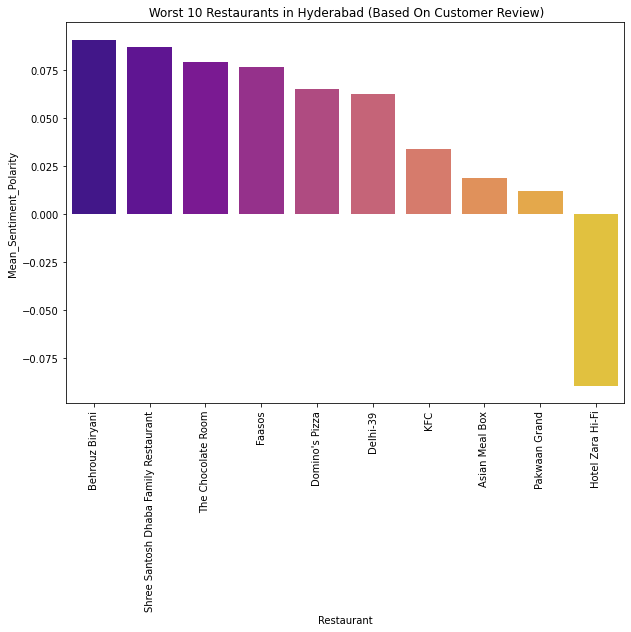

In [ ]:
# Worst 10 Restaurants in Hyderabad (Based On Customer Review)
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=df.tail(10), x="Restaurant",y='Mean_Sentiment_Polarity', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title(' Worst 10 Restaurants in Hyderabad (Based On Customer Review)')

 So Restaurant Zara Hi Fi is the least populer restaurant in Hyderabad Beacause That is the only Restaurant which has given Overall  Mean Sentiment Polarity -0.050, Means Most of the Customer has given -ve review about the services offered by Restaurant.

# **Top 10 Critics in The Market (Based on No of Follower)**

In [ ]:
# Top 10 Critics In The Industry who are having Maximum Number of Follower
critics= review_df.groupby(by='Reviewer')['No_of_review','No_of_Follower','Rating','Sentiment_Polarity','Sentiment_Subjectivity'].mean().sort_values(by='No_of_Follower',ascending = False).reset_index()

In [ ]:
critics.rename(columns={'Reviewer': "Name of Critics" ,'Rating':'Mean_Rating',
                         'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity'}, inplace =True)

Text(0.5, 1.0, 'Top 10 Critics In The Industry (Based On No of Follower)')

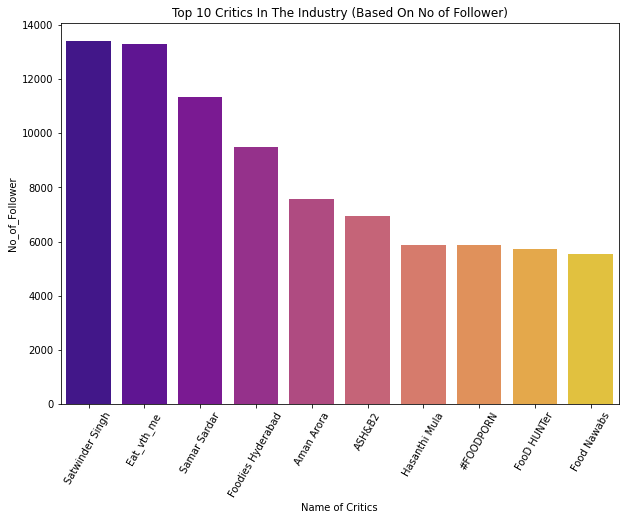

In [ ]:
# Top 10 Critics In The Industry who are having Maximum Number of Follower
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=critics.head(10), y='No_of_Follower', x='Name of Critics',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=60)
plt.title('Top 10 Critics In The Industry (Based On No of Follower)')

# **Top 10 Critics in The Market (Based on No of Reviews Given)**

In [ ]:
# Top 10 Critics In The Industry who have given maximum No of Reviews
critic= review_df.groupby(by='Reviewer')['No_of_review','No_of_Follower','Rating','Sentiment_Polarity','Sentiment_Subjectivity'].mean().sort_values(by='No_of_review',ascending = False).reset_index()

In [ ]:
critic.rename(columns={'Reviewer': "Name of Critics" ,'Rating':'Mean_Rating',
                         'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity'}, inplace =True)

Text(0.5, 1.0, 'Top 10 Critics In The Industry(Based On Max Reviews)')

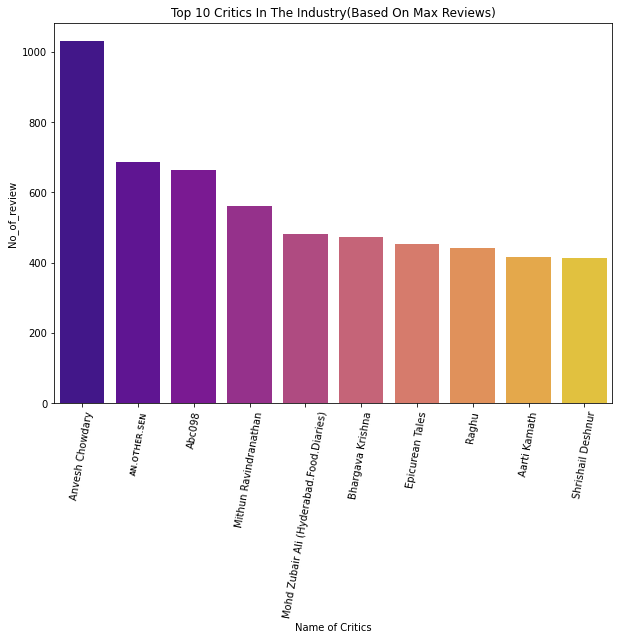

In [ ]:
# Top 10 Critics In The Industry who have given maximum No of Reviews
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=critic.head(10), y='No_of_review', x='Name of Critics',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=80)
plt.title('Top 10 Critics In The Industry(Based On Max Reviews)')

# **Multivariate Analysis**

## **1. Sentiment Polarity & Sentiment Subjectivity with Sentiments**

Text(0.5, 1.0, 'Sentiment Polarity Vs Sentiment Subjectivity')

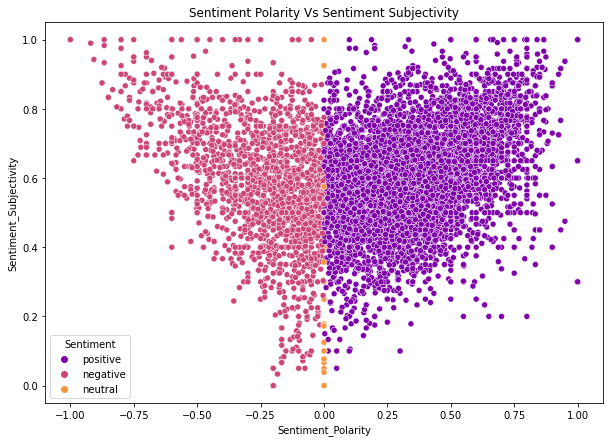

In [ ]:
# Sentiment Polarity Vs Sentiment Subjectivity
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity",
                hue="Sentiment", palette="plasma",data=review_df)
plt.title('Sentiment Polarity Vs Sentiment Subjectivity')

1.Sentiment Polarity lies between [-1,1], -1 defines a negative sentiment, 1 defines a positive sentiment and 0 defines neutral sentiment.

2. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.


## **2. Sentiment Polarity & Sentiment Subjectivity with Rating**

Text(0.5, 1.0, 'Sentiment Polarity Vs Sentiment Subjectivity w.r.to Rating')

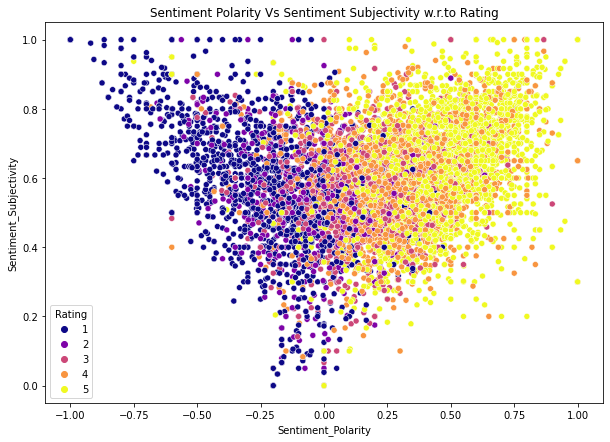

In [ ]:
# Sentiment Polarity Vs Sentiment Subjectivity with respective Rating
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity",
                hue="Rating", palette="plasma",data=review_df)
plt.title('Sentiment Polarity Vs Sentiment Subjectivity w.r.to Rating')

## **3. Sentiment Polarity & No_of_review given by customers with Sentiment**

Text(0.5, 1.0, 'Sentiment Score Vs No of Reviews given by Customer')

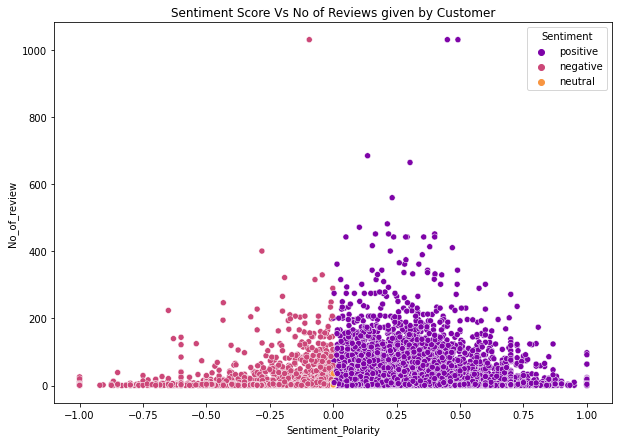

In [ ]:
# 'Sentiment Score Vs Customer Given No of Reviews
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Polarity", y="No_of_review",
                hue="Sentiment", palette="plasma",data=review_df)
plt.title('Sentiment Score Vs No of Reviews given by Customer')

## **4. Sentiment Polarity & Customer Having No of Follower with Sentiment**

Text(0.5, 1.0, 'Sentiment_Polarity Vs Customer Having No of Follower')

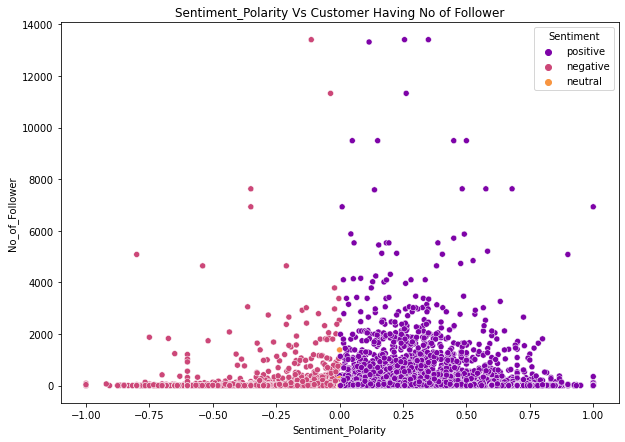

In [ ]:
# 'Sentiment_Polarity Vs Customer Having No of Follower'
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Polarity", y="No_of_Follower",
                hue="Sentiment", palette="plasma",data=review_df)
plt.title('Sentiment_Polarity Vs Customer Having No of Follower')

## **5. Sentiment Polarity & Customer Having No of pictres shared by cutomer duting reviews with Sentiment**

Text(0.5, 1.0, 'Sentiment Score Vs No of Picture Shared By Customer')

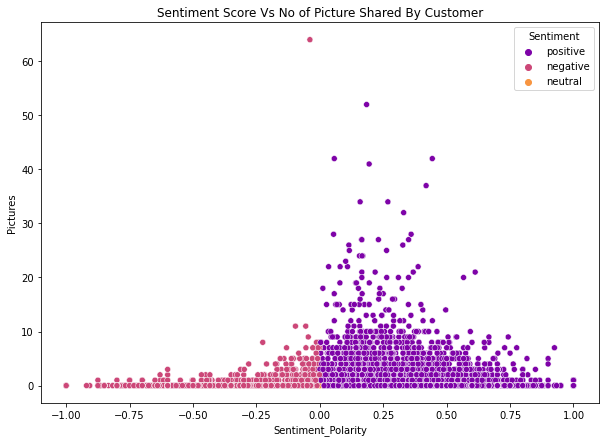

In [ ]:
# 'Sentiment Score Vs No of Picture Shared By Customer'
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Polarity", y="Pictures",
                hue="Sentiment", palette="plasma",data=review_df)
plt.title('Sentiment Score Vs No of Picture Shared By Customer')

## **6. Average Ratings given by customers to Restaurants in Hyderabad**

Text(0.5, 1.0, 'Average Ratings of Restaurants in Hyderabad')

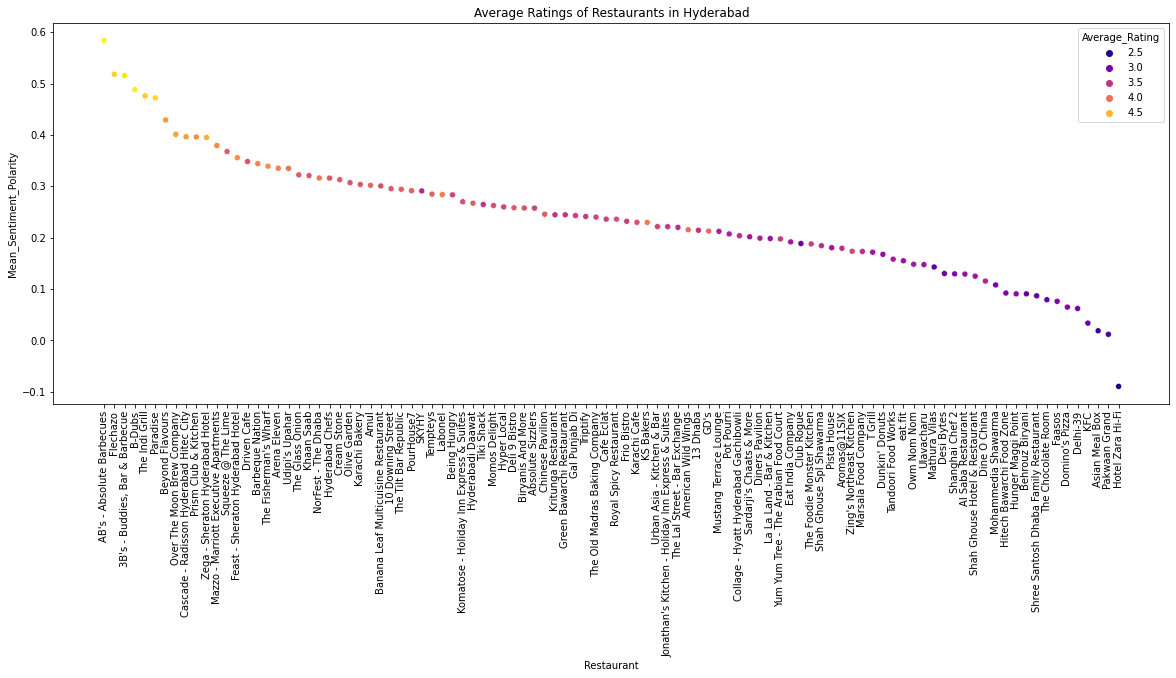

In [ ]:
# Lets find 'Average Ratings of Restaurants in Hyderabad'
plt.figure(figsize=(20,7))
plot = sns.scatterplot(y="Mean_Sentiment_Polarity", x="Restaurant", hue ='Average_Rating',
                 palette="plasma",data=df)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Average Ratings of Restaurants in Hyderabad')

# **Clustering of Restaurants**

In [ ]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       104 non-null    object 
 1   Cost                       104 non-null    int64  
 2   latitude                   104 non-null    float64
 3   longitude                  104 non-null    float64
 4   Has_Featured               104 non-null    float64
 5   Outdoor seating            104 non-null    int64  
 6   Entertainment              104 non-null    int64  
 7   Wifi                       104 non-null    int64  
 8   Breakfast                  104 non-null    int64  
 9   Parking available          104 non-null    int64  
 10  Seating available          104 non-null    int64  
 11  Alcohol avialable          104 non-null    int64  
 12  Family Friendly            104 non-null    int64  
 13  Home Delivery              104 non-null    int64  

# **Clustering Based on the Location of Restaurants**

In [ ]:
clust1=names_df.loc[0:,['Name','latitude','longitude']].set_index('Name')

In [ ]:
clust1.dropna(inplace=True)

In [ ]:
# Lets standerdize the each features for Uniformity of values in formation of cluster
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster=sc.fit_transform(clust1)
new_df = pd.DataFrame(cluster , columns= clust1.columns.to_list())

# **1. K Means Clustering Algorithem**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from scipy.spatial.distance import cdist

In [ ]:
#  Lets fit K-means clustering algorithms for diiffernt clusters and storing the values of different metrices in an empty lists
inertia=[]
silhouette_scorelist = []
distortions = []
for i in range(1,11):
  kmeans= KMeans(n_clusters = i,init="k-means++")
  kmeans.fit(new_df)
  inertia.append(kmeans.inertia_)
  y_kmeans = kmeans.predict(new_df)
  distortions.append(sum(np.min(cdist(new_df, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / new_df.shape[0])
  if i >1:
    silhouette_avg = silhouette_score(new_df, y_kmeans)
    silhouette_scorelist.append(silhouette_avg)

In [ ]:
# Lets from dataframe of different Metrices like Inertia, distortion & silhouette_score
df= pd.DataFrame({'No_cluster': range(1,11),'Inertia' : inertia, 'Distortions' : distortions})
df1= pd.DataFrame({'No_cluster': range(2,11),'Inertia' : inertia[1:], 'silhouette_score': silhouette_scorelist , 'Distortions' : distortions[1:]})
df1

,No_cluster,Inertia,silhouette_score,Distortions
0,2,91.376258,0.637160,0.811447
1,3,40.851704,0.596808,0.560356
2,4,27.915488,0.546304,0.424182
3,5,21.476801,0.544982,0.358434
4,6,15.830496,0.527961,0.321624
5,7,12.813507,0.504833,0.269053
6,8,10.329397,0.563161,0.235867
7,9,8.732326,0.552794,0.227824
8,10,7.847729,0.542485,0.212952


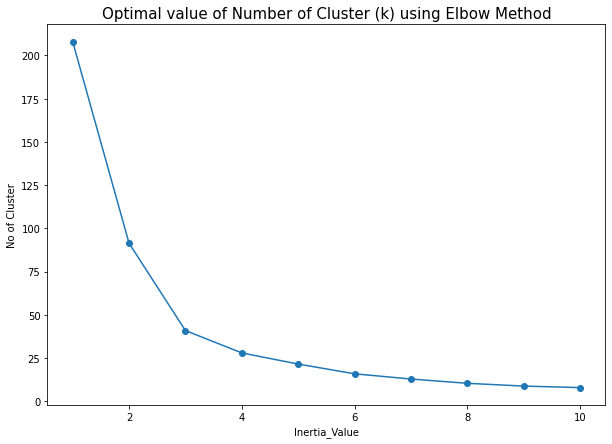

In [ ]:
# Lets find optimal value of Number of Cluster (k) using Elbow Method. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.Inertia, marker = 'o')
plt.xlabel('Inertia_Value')
plt.ylabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using Elbow Method',fontsize=15)
plt.show()

So as per the graph, according Elbow method optimum number of cluster (k) will be 3.

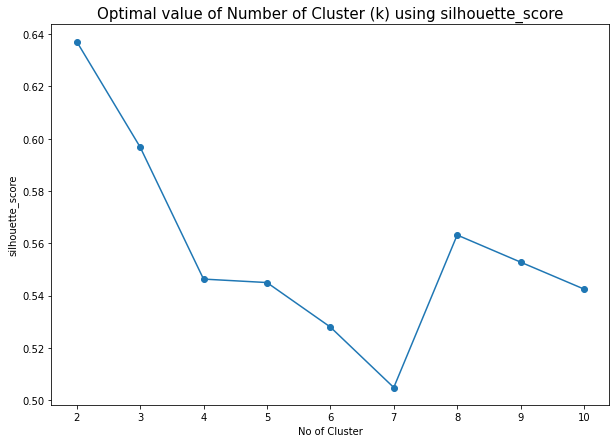

In [ ]:
# # Lets find optimal value of Number of Cluster (k) using silhouette_score. 
plt.figure(figsize = (10,7))
plt.plot(df1.No_cluster,df1.silhouette_score, marker = 'o')
plt.ylabel('silhouette_score')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using silhouette_score',fontsize=15)
plt.show()

So as per the graph, according silhouette_score optimum number of cluster (k) will be 2 or 3.

For n_clusters = 2 The average silhouette_score is : 0.6371597209436922
For n_clusters = 3 The average silhouette_score is : 0.5968079274777695
For n_clusters = 4 The average silhouette_score is : 0.5463044713144974
For n_clusters = 5 The average silhouette_score is : 0.5448191612164694
For n_clusters = 6 The average silhouette_score is : 0.5257634392808858
For n_clusters = 7 The average silhouette_score is : 0.5169435317006704
For n_clusters = 8 The average silhouette_score is : 0.5631606795220621
For n_clusters = 9 The average silhouette_score is : 0.5679334654455445
For n_clusters = 10 The average silhouette_score is : 0.564966200913796


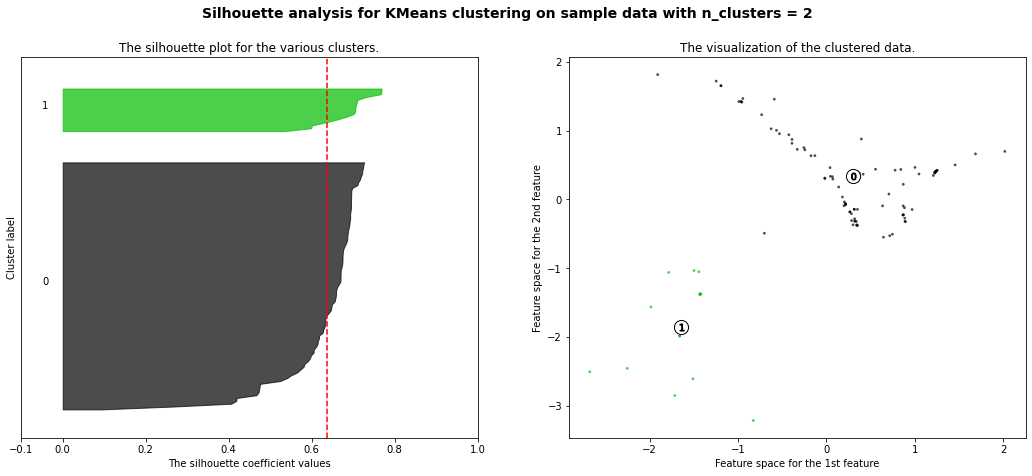

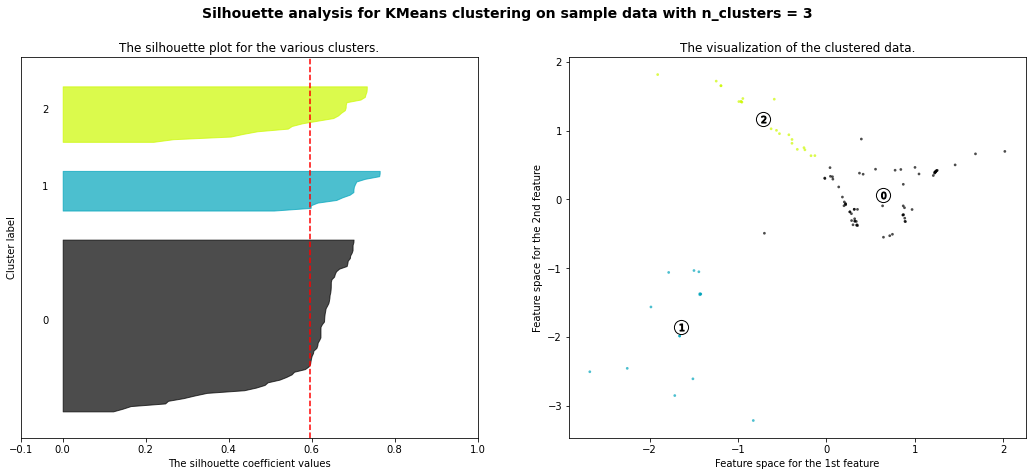

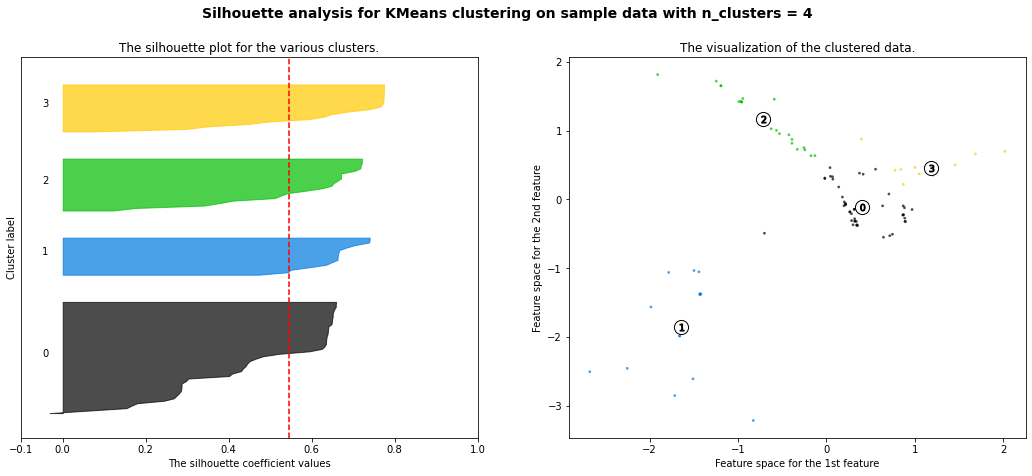

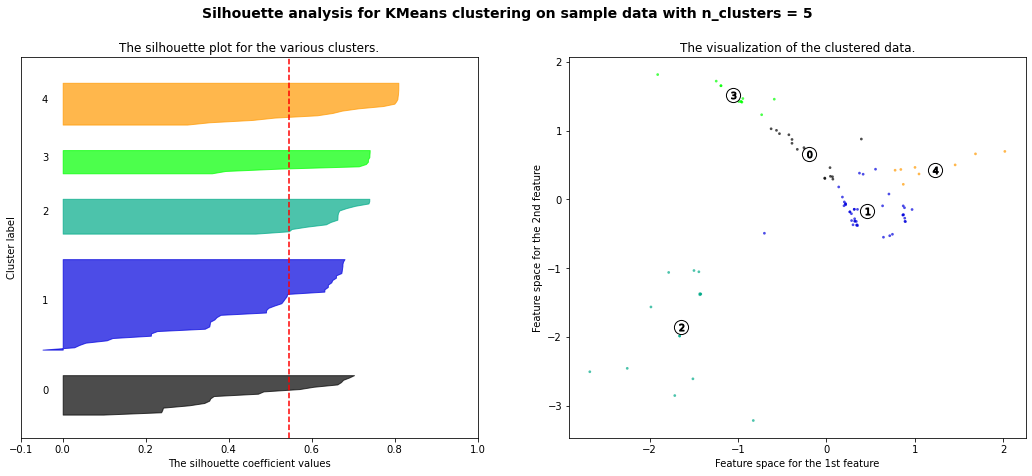

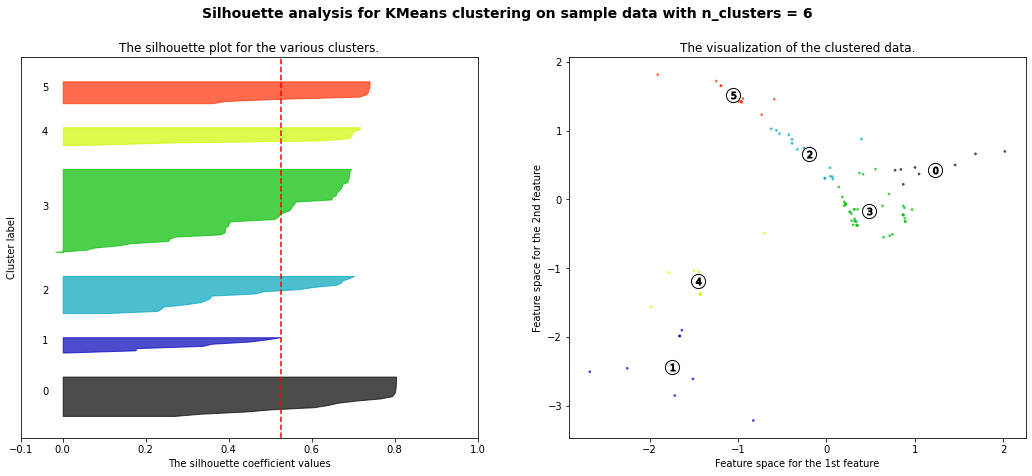

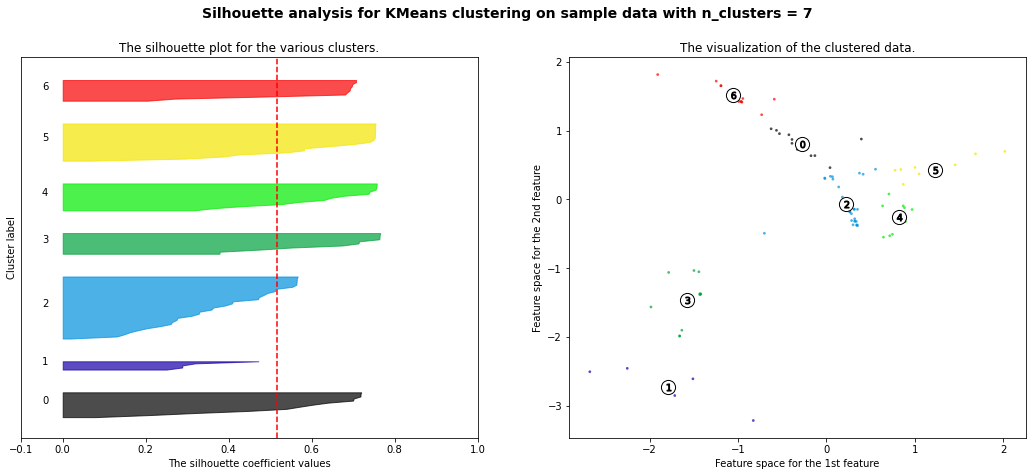

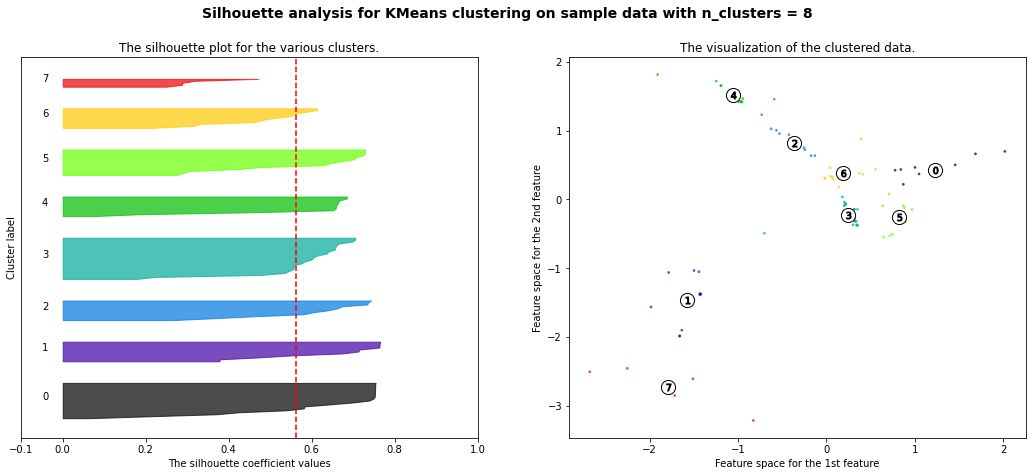

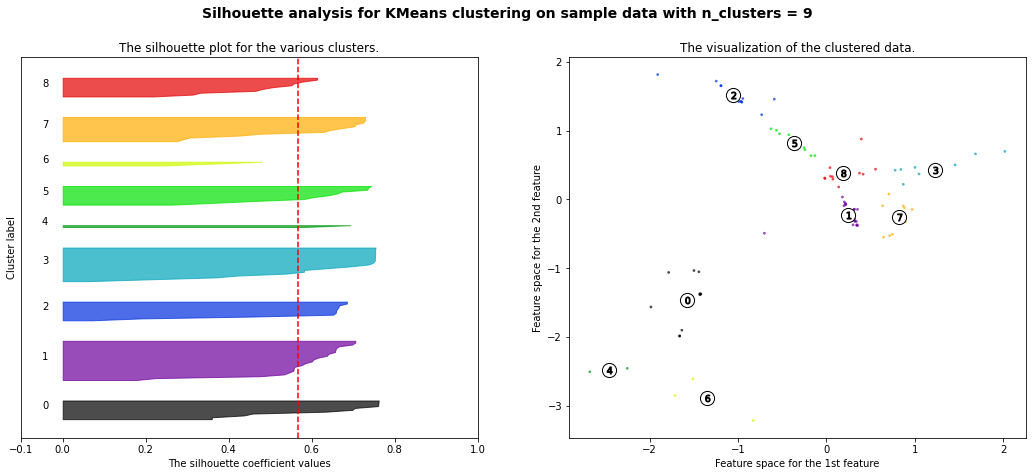

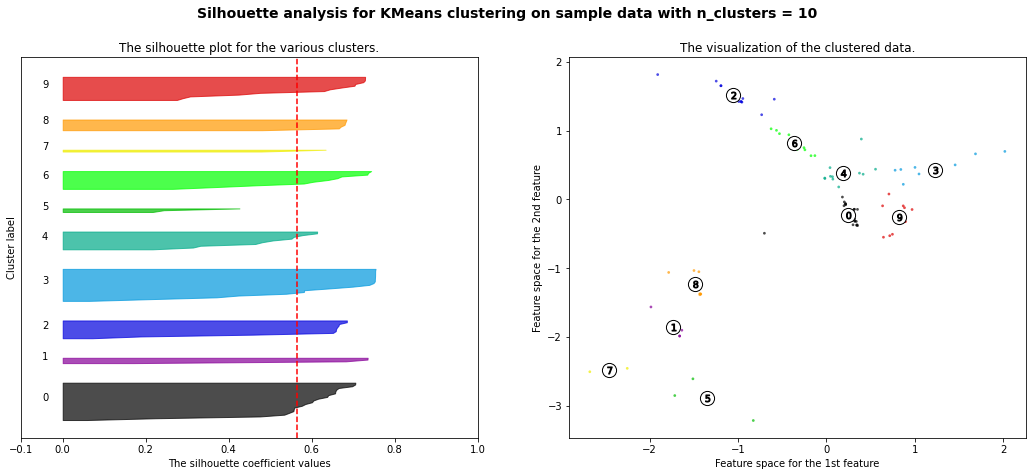

In [ ]:
# Lets do Silhouette analysis for K Means clustering Algorithem and find optimum number of cluster(k)
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2,3,4,5,6,7,8,9,10]
X =cluster
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## So as On the basis silhouette_score as well as & elbow method optimum number of cluster will be 3. So lets take optimum number of cluster = 3 and explore it further.

In [ ]:
# So now lets fit the K means Clustering Algorithem for  optimal number of clusters (n_cluster = 3)
kmeans= KMeans(n_clusters = 3,init="k-means++")
kmeans.fit(new_df)
# Predicted values of clusters
y_kmeans = kmeans.predict(new_df)
y_kmeans

array([0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2], dtype=int32)

In [ ]:
# So lets Store the cluster values obtained by K means Algorithem into main dataset.
final_df = names_df.copy()
final_df['Cluster_Kmeans'] = y_kmeans

Text(0.5, 1.0, 'Number of Restaurants in different Clusters')

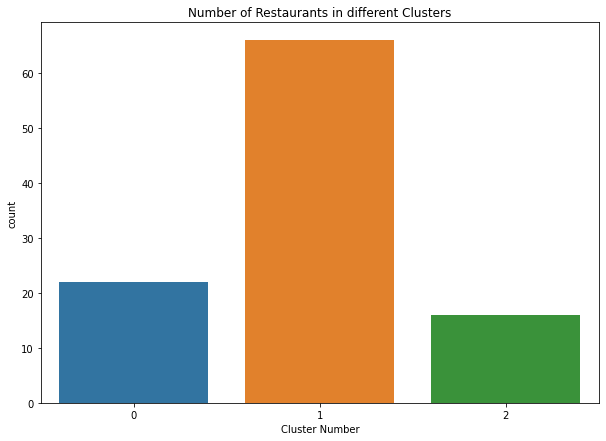

In [ ]:
# So lets find out the number of restaurants in Each Cluster According K means Clustering Technique
plt.figure (figsize = (10,7))
p=sns.countplot(final_df['Cluster_Kmeans'])
p.set_xlabel('Cluster Number')
plt.title("Number of Restaurants in different Clusters")

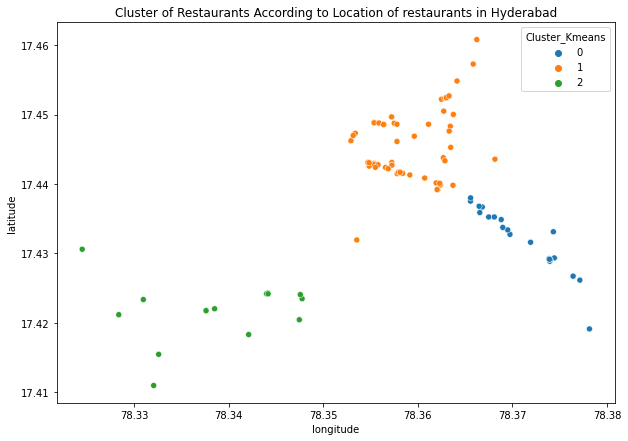

In [ ]:
# Differnt Clusters obtained by K Means Clustering Algorithem
plt.figure(figsize=(10,7))
sns.scatterplot(data=final_df, x='longitude', y = 'latitude', hue ='Cluster_Kmeans',palette ="tab10")
plt.title("Cluster of Restaurants According to Location of restaurants in Hyderabad", fontsize=12)
plt.show()

# **2.Hierachical Clustering Algorithem**

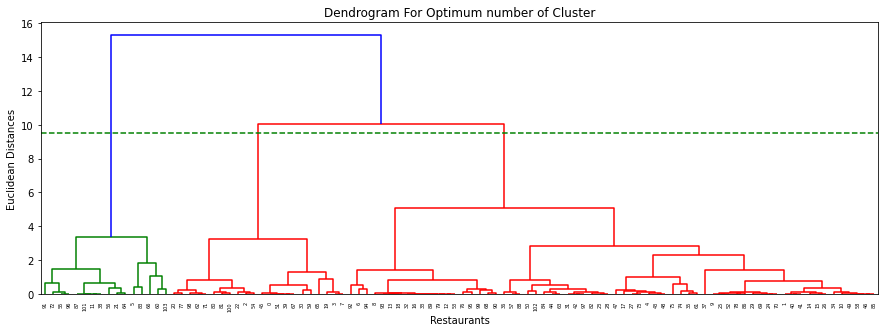

In [ ]:
# So lets Plot dendrogram and find out Optimum number of Cluster by using Hierachical Clustering Algorithem.
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(cluster, method = 'ward'))
plt.axhline(y=9.5, color="green", linestyle="--",label= 'Number of Cluster = 3')
# Lets Plot dendrogram
plt.title('Dendrogram For Optimum number of Cluster')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.show() 

## So as per the dendrogram (Hierachichal Clustering algorithem) we can chose the optimal number of clusters based on hierarchical structure of the dendrogram will be equal to 3.

In [ ]:
# So Lets fit Hierarchical clustering Algorithem (AgglomerativeClustering Technique) for optimum number of cluster(K=3)
from sklearn.cluster import AgglomerativeClustering
model_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
ypredicted_hc = model_hc.fit_predict(cluster)
ypredicted_hc

array([2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1])

In [ ]:
# So lets Store the cluster values obtained by Hierarchical clustering Algorithem into main dataset.
final_df['Cluster_Hrc'] = ypredicted_hc

Text(0.5, 1.0, 'Number of Restaurants in different Clusters')

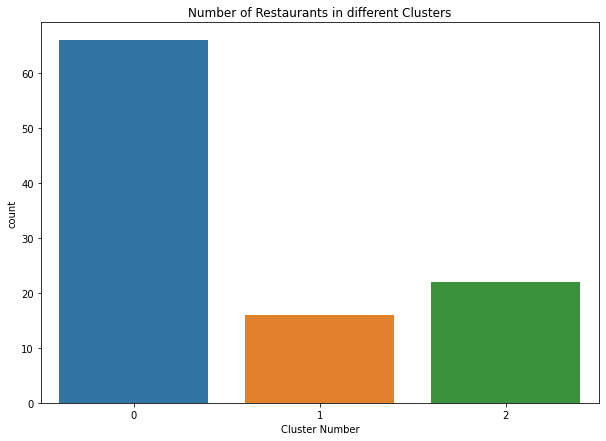

In [ ]:
# So lets find out the number of restaurants in Each Cluster According Hierarchical clustering Algorithem.
plt.figure (figsize = (10,7))
p=sns.countplot(final_df['Cluster_Hrc'])
p.set_xlabel('Cluster Number')
plt.title("Number of Restaurants in different Clusters")

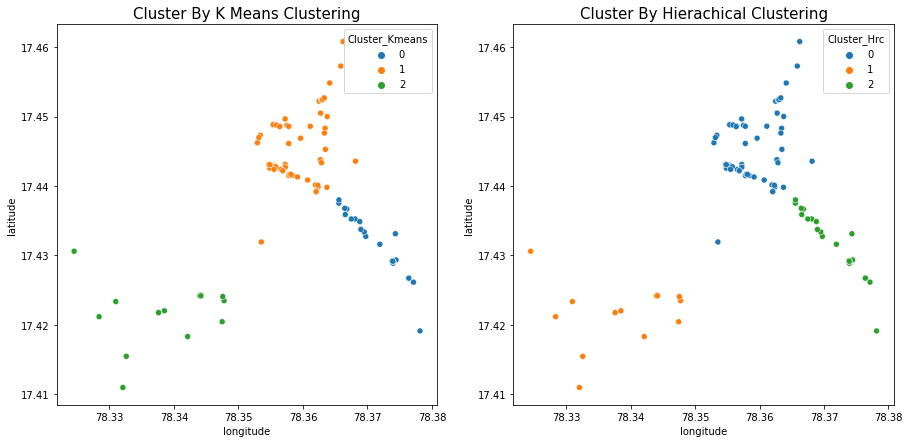

In [ ]:
# So lets Compare the Cluster obtained by Both Method 1. K Means Clustering & 2.Hierachical Clustering respectively
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
p=sns.scatterplot(ax=axes[0], data=final_df, x='longitude', y = 'latitude', hue ='Cluster_Kmeans',palette ="tab10")
p.set_title("Cluster By K Means Clustering", fontsize=15)
q=sns.scatterplot(ax=axes[1],data=final_df, x='longitude', y = 'latitude', hue ='Cluster_Hrc',palette ="tab10")
q.set_title("Cluster By Hierachical Clustering", fontsize=15)
plt.show()

## So we can see from above graphs Cluster obtained by the both method K Means Clustering Algorithem & Hierachical Clustering Algorithem are almost same.

# **Average Cost of Dining Per Person in Different Cluster**

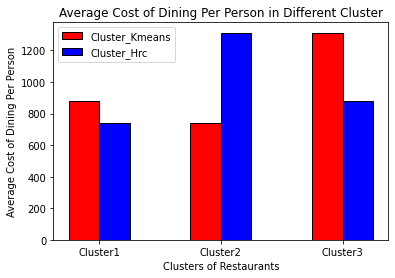

In [ ]:
# So lets find out Average Cost of Dining Per Person in Different Cluster
avg_cost=pd.DataFrame(final_df.groupby(['Cluster_Kmeans','Cluster_Hrc'])['Cost'].mean()).reset_index()
plt.bar(avg_cost.Cluster_Kmeans, avg_cost.Cost, color = 'red',
        width = 0.25, edgecolor = 'black',
        label='Cluster_Kmeans')
plt.bar(avg_cost.Cluster_Hrc + 0.25, avg_cost.Cost, color = 'blue',
        width = 0.25, edgecolor = 'black',
        label='Cluster_Hrc')
  
plt.xlabel("Clusters of Restaurants")
plt.ylabel("Average Cost of Dining Per Person")
plt.title("Average Cost of Dining Per Person in Different Cluster")
r = np.arange(3)
plt.xticks(r + 0.25/2,['Cluster1','Cluster2','Cluster3'])
plt.legend() 
plt.show()

# **Clustering Based on all the available fetaures of Restaurants**

In [ ]:
clust2=names_df.loc[0:, 0:-2].set_index('Name')

In [ ]:
clust2.dropna(inplace=True)

In [ ]:
# Lets standerdize the each features for Uniformity of values in formation of cluster
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster=sc.fit_transform(clust1)
new_df = pd.DataFrame(cluster , columns= clust1.columns.to_list())

# **1. K Means Clustering Algorithem**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from scipy.spatial.distance import cdist

In [ ]:
#  Lets fit K-means clustering algorithms for diiffernt clusters and storing the values of different metrices in an empty lists
inertia=[]
silhouette_scorelist = []
distortions = []
for i in range(1,11):
  kmeans= KMeans(n_clusters = i,init="k-means++")
  kmeans.fit(new_df)
  inertia.append(kmeans.inertia_)
  y_kmeans = kmeans.predict(new_df)
  distortions.append(sum(np.min(cdist(new_df, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / new_df.shape[0])
  if i >1:
    silhouette_avg = silhouette_score(new_df, y_kmeans)
    silhouette_scorelist.append(silhouette_avg)

In [ ]:
# Lets from dataframe of different Metrices like Inertia, distortion & silhouette_score
df= pd.DataFrame({'No_cluster': range(1,11),'Inertia' : inertia, 'Distortions' : distortions})
df1= pd.DataFrame({'No_cluster': range(2,11),'Inertia' : inertia[1:], 'silhouette_score': silhouette_scorelist , 'Distortions' : distortions[1:]})
df1

,No_cluster,Inertia,silhouette_score,Distortions
0,2,91.376258,0.637160,0.811447
1,3,40.851704,0.596808,0.560356
2,4,27.915488,0.546304,0.424182
3,5,21.476801,0.544982,0.358434
4,6,15.830496,0.527961,0.321624
5,7,12.813507,0.504833,0.269053
6,8,10.329397,0.563161,0.235867
7,9,8.732326,0.552794,0.227824
8,10,7.847729,0.542485,0.212952


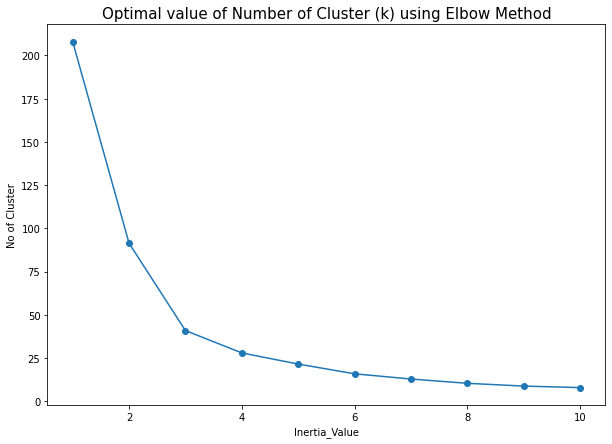

In [ ]:
# Lets find optimal value of Number of Cluster (k) using Elbow Method. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.Inertia, marker = 'o')
plt.xlabel('Inertia_Value')
plt.ylabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using Elbow Method',fontsize=15)
plt.show()

So as per the graph, according Elbow method optimum number of cluster (k) will be 3.

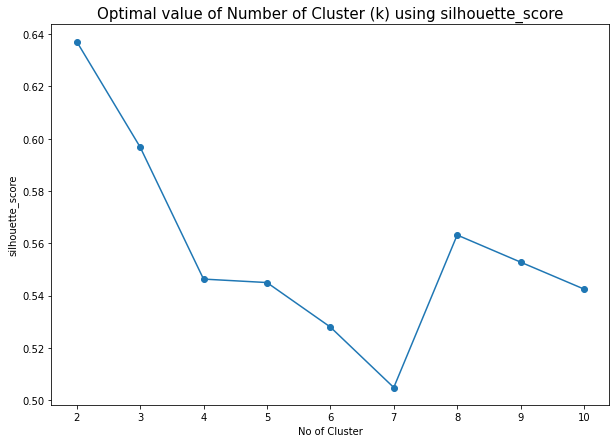

In [ ]:
# # Lets find optimal value of Number of Cluster (k) using silhouette_score. 
plt.figure(figsize = (10,7))
plt.plot(df1.No_cluster,df1.silhouette_score, marker = 'o')
plt.ylabel('silhouette_score')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using silhouette_score',fontsize=15)
plt.show()

So as per the graph, according silhouette_score optimum number of cluster (k) will be 2 or 3.

For n_clusters = 2 The average silhouette_score is : 0.6371597209436922
For n_clusters = 3 The average silhouette_score is : 0.5968079274777695
For n_clusters = 4 The average silhouette_score is : 0.5463044713144974
For n_clusters = 5 The average silhouette_score is : 0.5448191612164694
For n_clusters = 6 The average silhouette_score is : 0.5257634392808858
For n_clusters = 7 The average silhouette_score is : 0.5169435317006704
For n_clusters = 8 The average silhouette_score is : 0.5631606795220621
For n_clusters = 9 The average silhouette_score is : 0.5679334654455445
For n_clusters = 10 The average silhouette_score is : 0.564966200913796


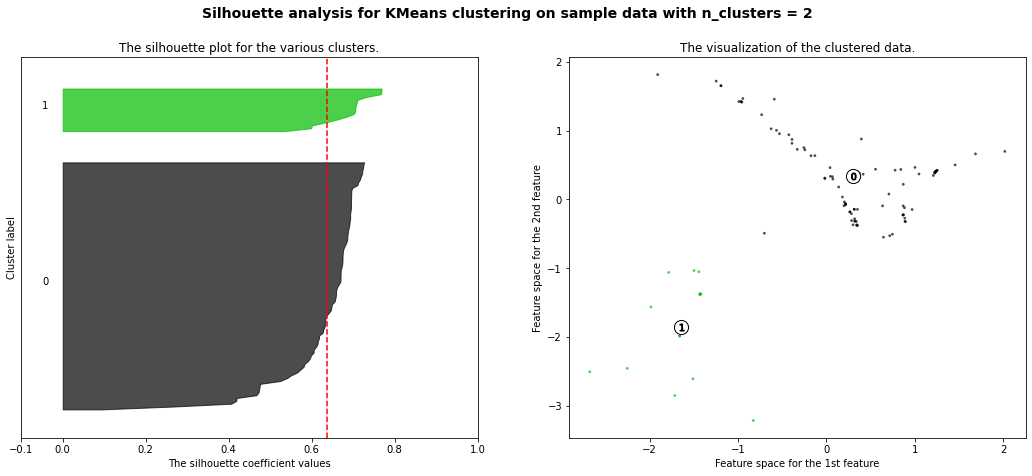

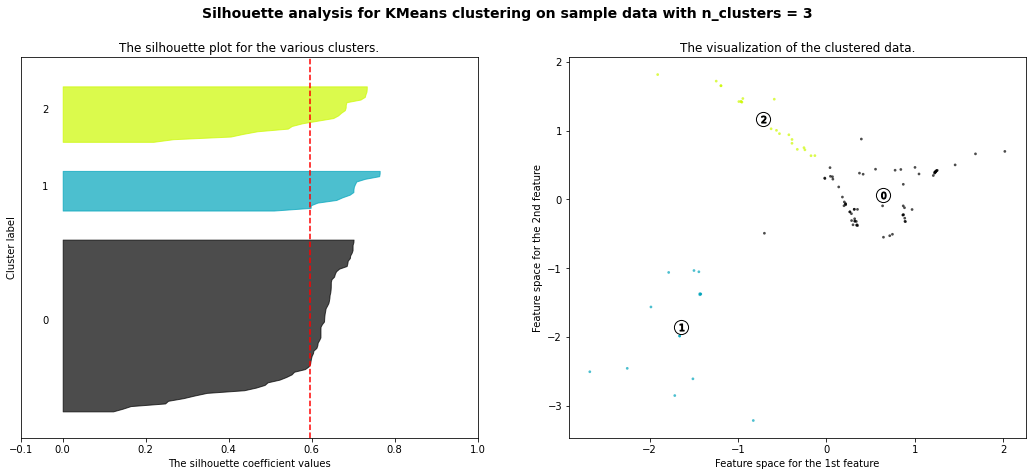

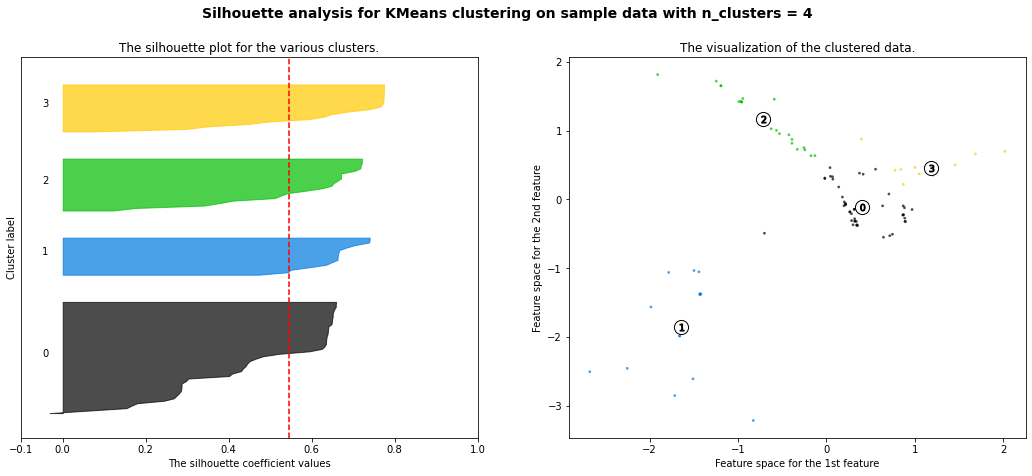

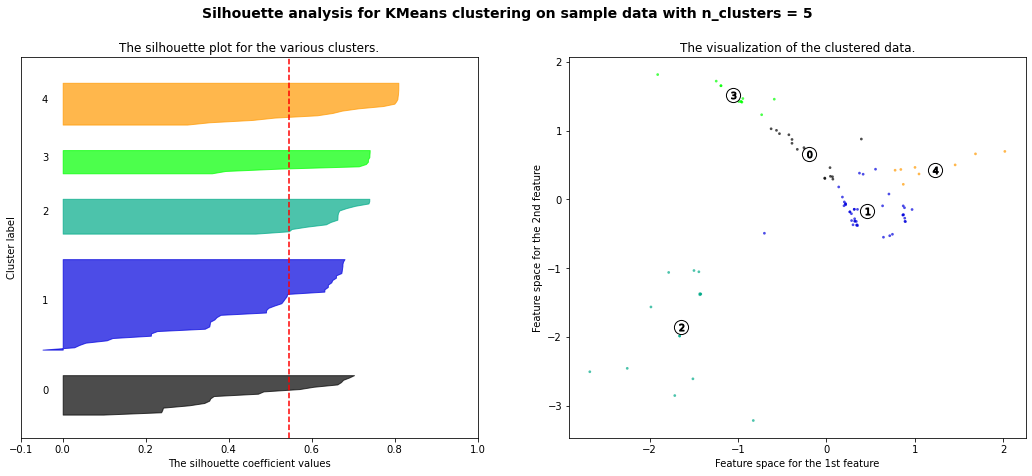

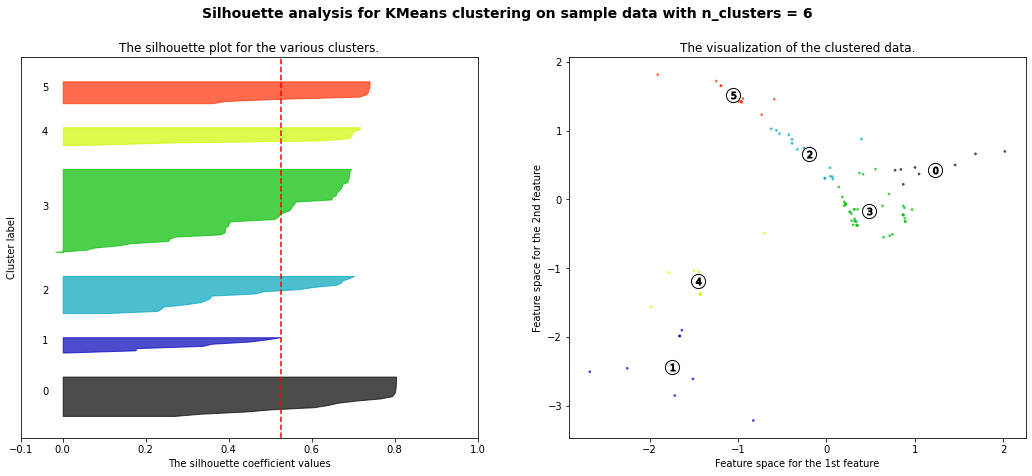

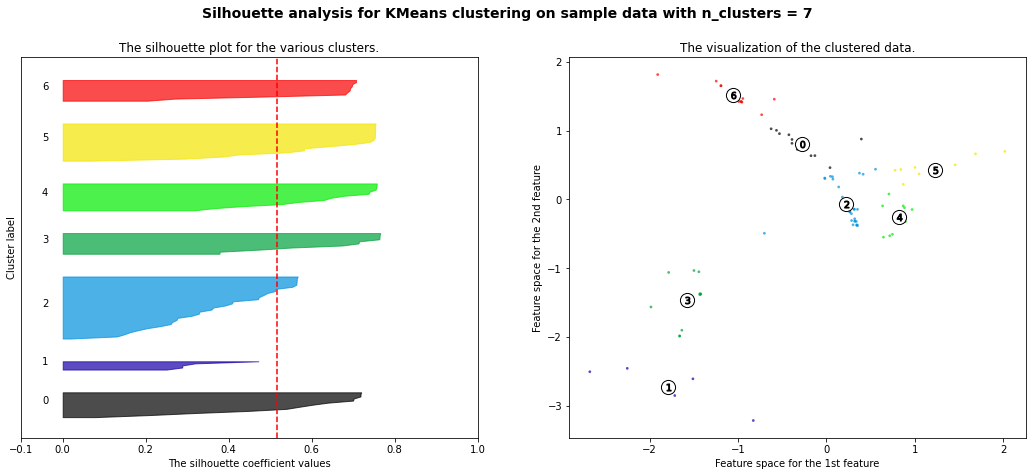

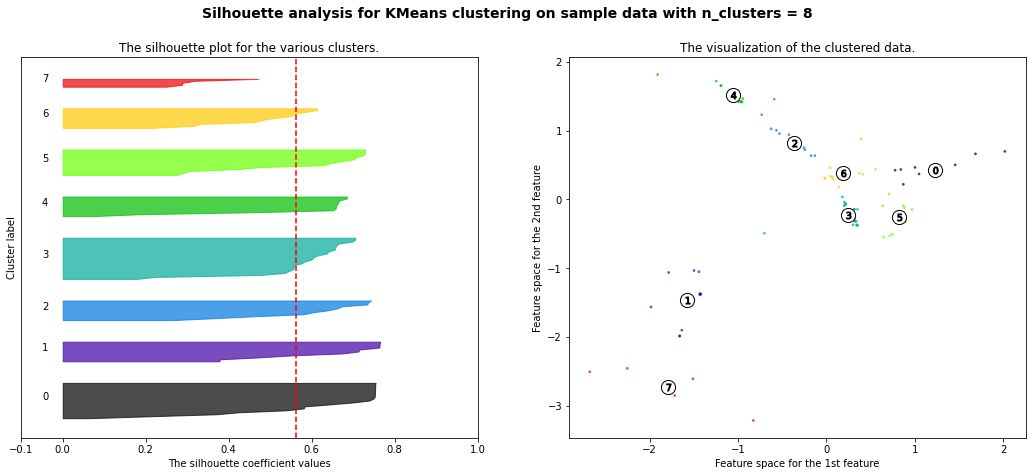

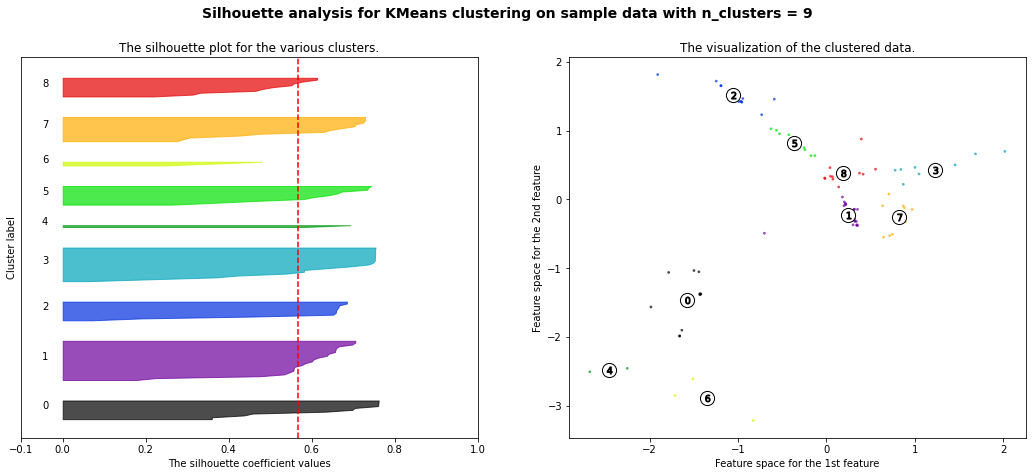

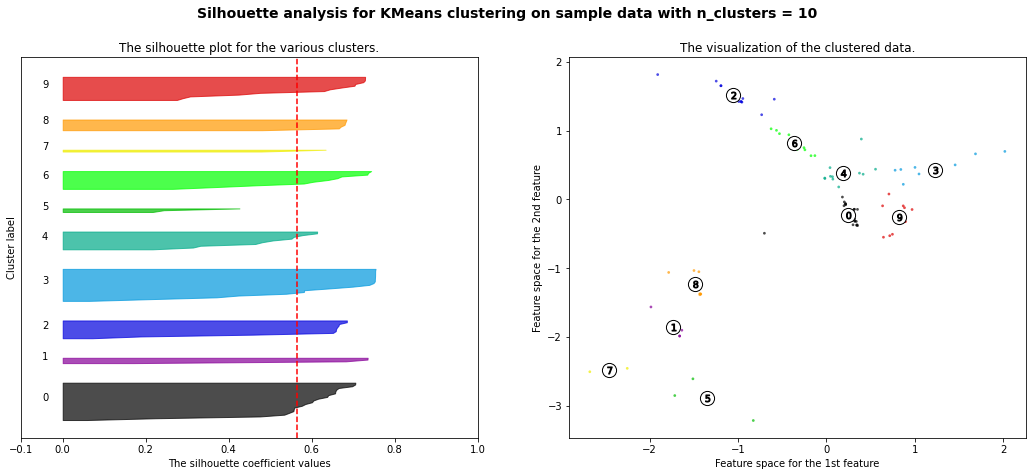

In [ ]:
# Lets do Silhouette analysis for K Means clustering Algorithem and find optimum number of cluster(k)
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2,3,4,5,6,7,8,9,10]
X =cluster
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## So as On the basis silhouette_score as well as & elbow method optimum number of cluster will be 3. So lets take optimum number of cluster = 3 and explore it further.

In [ ]:
# So now lets fit the K means Clustering Algorithem for  optimal number of clusters (n_cluster = 3)
kmeans= KMeans(n_clusters = 3,init="k-means++")
kmeans.fit(new_df)
# Predicted values of clusters
y_kmeans = kmeans.predict(new_df)
y_kmeans

array([0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2], dtype=int32)

In [ ]:
# So lets Store the cluster values obtained by K means Algorithem into main dataset.
final_df = names_df.copy()
final_df['Cluster_Kmeans'] = y_kmeans

Text(0.5, 1.0, 'Number of Restaurants in different Clusters')

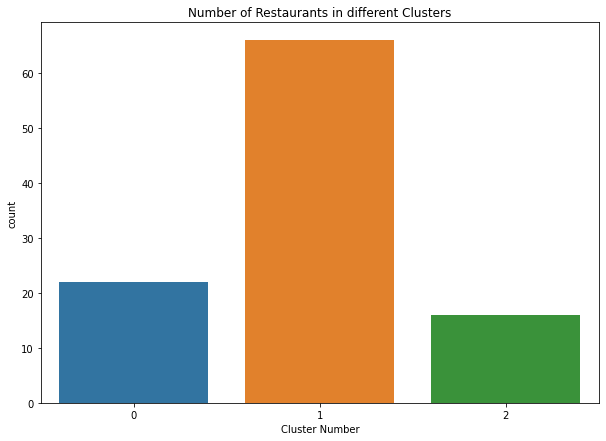

In [ ]:
# So lets find out the number of restaurants in Each Cluster According K means Clustering Technique
plt.figure (figsize = (10,7))
p=sns.countplot(final_df['Cluster_Kmeans'])
p.set_xlabel('Cluster Number')
plt.title("Number of Restaurants in different Clusters")

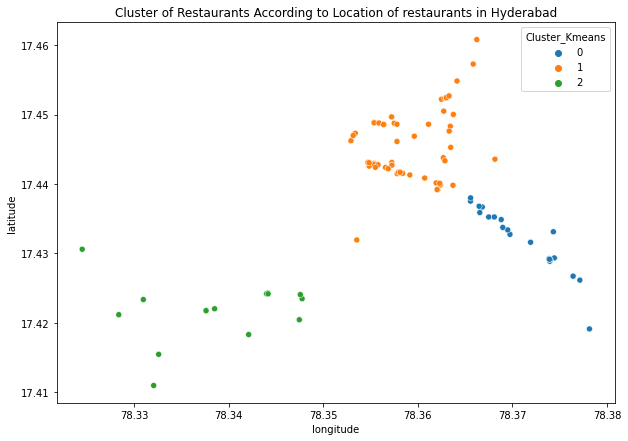

In [ ]:
# Differnt Clusters obtained by K Means Clustering Algorithem
plt.figure(figsize=(10,7))
sns.scatterplot(data=final_df, x='longitude', y = 'latitude', hue ='Cluster_Kmeans',palette ="tab10")
plt.title("Cluster of Restaurants According to Location of restaurants in Hyderabad", fontsize=12)
plt.show()

# **2.Hierachical Clustering Algorithem**

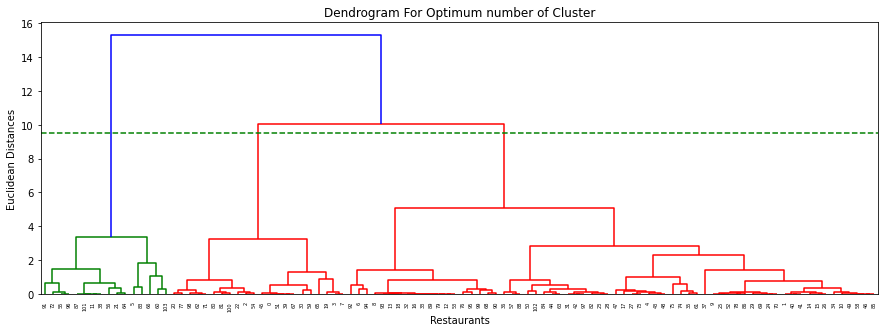

In [ ]:
# So lets Plot dendrogram and find out Optimum number of Cluster by using Hierachical Clustering Algorithem.
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(cluster, method = 'ward'))
plt.axhline(y=9.5, color="green", linestyle="--",label= 'Number of Cluster = 3')
# Lets Plot dendrogram
plt.title('Dendrogram For Optimum number of Cluster')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.show() 

## So as per the dendrogram (Hierachichal Clustering algorithem) we can chose the optimal number of clusters based on hierarchical structure of the dendrogram will be equal to 3.

In [ ]:
# So Lets fit Hierarchical clustering Algorithem (AgglomerativeClustering Technique) for optimum number of cluster(K=3)
from sklearn.cluster import AgglomerativeClustering
model_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
ypredicted_hc = model_hc.fit_predict(cluster)
ypredicted_hc

array([2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1])

In [ ]:
# So lets Store the cluster values obtained by Hierarchical clustering Algorithem into main dataset.
final_df['Cluster_Hrc'] = ypredicted_hc

Text(0.5, 1.0, 'Number of Restaurants in different Clusters')

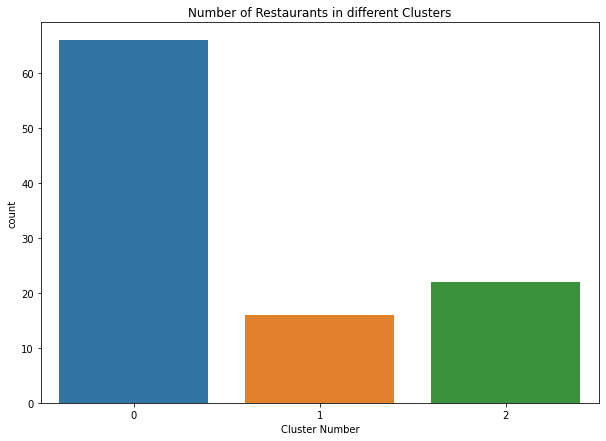

In [ ]:
# So lets find out the number of restaurants in Each Cluster According Hierarchical clustering Algorithem.
plt.figure (figsize = (10,7))
p=sns.countplot(final_df['Cluster_Hrc'])
p.set_xlabel('Cluster Number')
plt.title("Number of Restaurants in different Clusters")

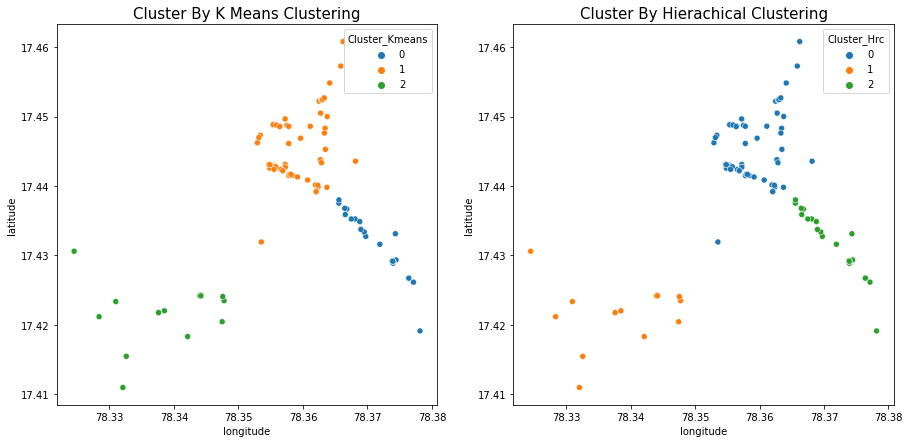

In [ ]:
# So lets Compare the Cluster obtained by Both Method 1. K Means Clustering & 2.Hierachical Clustering respectively
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
p=sns.scatterplot(ax=axes[0], data=final_df, x='longitude', y = 'latitude', hue ='Cluster_Kmeans',palette ="tab10")
p.set_title("Cluster By K Means Clustering", fontsize=15)
q=sns.scatterplot(ax=axes[1],data=final_df, x='longitude', y = 'latitude', hue ='Cluster_Hrc',palette ="tab10")
q.set_title("Cluster By Hierachical Clustering", fontsize=15)
plt.show()

## So we can see from above graphs Cluster obtained by the both method K Means Clustering Algorithem & Hierachical Clustering Algorithem are almost same.

# **Average Cost of Dining Per Person in Different Cluster**

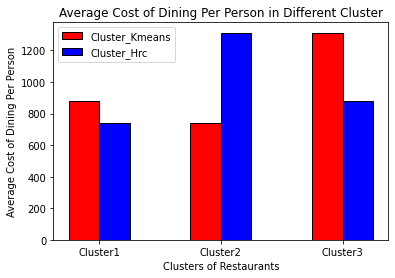

In [ ]:
# So lets find out Average Cost of Dining Per Person in Different Cluster
avg_cost=pd.DataFrame(final_df.groupby(['Cluster_Kmeans','Cluster_Hrc'])['Cost'].mean()).reset_index()
plt.bar(avg_cost.Cluster_Kmeans, avg_cost.Cost, color = 'red',
        width = 0.25, edgecolor = 'black',
        label='Cluster_Kmeans')
plt.bar(avg_cost.Cluster_Hrc + 0.25, avg_cost.Cost, color = 'blue',
        width = 0.25, edgecolor = 'black',
        label='Cluster_Hrc')
  
plt.xlabel("Clusters of Restaurants")
plt.ylabel("Average Cost of Dining Per Person")
plt.title("Average Cost of Dining Per Person in Different Cluster")
r = np.arange(3)
plt.xticks(r + 0.25/2,['Cluster1','Cluster2','Cluster3'])
plt.legend() 
plt.show()

In [238]:
# '''
# Summary/Recommendations

# 90% of observations belong to India.
# USA(4) has higher ratings than India(3.5) and a majority of Indian restaurants have 0 ratings. Either Zomato should nudge customers to rate or these are newly onboarded restaurants.
# US customers provide ratings more frequently and consistently than Indians.
# Popular Indian cuisine is North Indian owing to4 major North Indian cities and for the USA it’s all Americana food.
# India and US have moderate food prices as compared to the rest of the countries.
# Better affordability has led to restaurants offering in price range 1 but this could affect Zomato’s unit economics. The average price range 1 is Rs 284, except this, all the rest price ranges provide positive returns based on previous analysis on unit economics.
# Positive relation exists between ratings and the average cost for two, this could be because of the assumed notion that premium restaurants have good ambiance or better service, whereas regular restaurants cannot provide such an experience which could lead to lower ratings.
# Provide reservations and online delivery to receive valuable customer feedback and rating.
# Nudge price range 1 and 2 restaurant’s customers to vote more number of time.
# Dine-in without reservation is cheaper for price range 1,2,3 restaurants, as no commission is charged.